# O que está sendo pedido

As equipes devem selecionar uma base de dados real estruturada e aplicar o **processo do KDD**.

A primeira coisa que vocês precisam definir é o objetivo da análise. Esse objetivo pode consistir no desenvolvimento de um classificador para um determinado fim ou uma análise que use utilize um classificador como ferramenta de extração de padrões.

Os critérios de avaliação serão: 

Estrutura e organização do relatório: o relatório pode estar no notebook, mas lembrem que é um relatório. É esperado que estejam textualmente descritos o objetivo do trabalho, as fontes de dados utilizadas, o dicionário de dados, o que foi realizado para alcançar objetivo, o que foi testado, o que foi observado em cada análise, as decisões tomadas e suas justificativas, análise final do que foi alcançado e suas limitações.

Análise exploratória: análise univariada e multivariada.

Pré-processamento: aplicação correta das técnicas de pré-processamento ensinadas em sala que fizerem sentido para a base analisada.

Mineração: aplicação dos algoritmos de classificação apresentados até o momento no curso e tunning de parâmetros.

Avaliação: aplicação e análise correta dos processos de avaliação que mais fazem sentido para o projeto em questão a fim de verificar a utilidade e confiabilidade dos padrões observados. Aqui eu espero não só análise estatística da performance dos classificadores, mas uma discussão sobre os padrões encontrados e as deficiências (quando ele erra mais?)
Anexem aqui o relatório final, os notebooks e as fontes de dados utilizadas. Basta uma postagem por equipe.

1. Qual o objetivo da analise? 
2. O que esperamos conseguir com o final do trabalho?
    a. 

# Reservas de Hotel
## Análise do dataset 'Hotel Reservations Dataset'
###### Este notebook é parte integrante do conjunto de arquivos referentes à avaliação final da disciplina de Mineração de Dados.

### Grupo de trabalho

1. João Freitas,
2. João Kruschewsky,
3. Vinícius Matos, 
4. Vito Magarão 

## Link para a base de dados
#### https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

## Resumo do dataset

Este dataset contém informações referentes as reservas realizadas por clientes, canceladas ou não, da rede 'INN Hotels' e explicitam características abrangentes, indo de preço e tempo de estadia até pedidos especiais feitos pelos clientes. Alguns valores retornados estão representados em formas de siglas ou códigos. Isso ocorre para que a tabela seja visualizada em um tamanho aceitável e para que seja possível verificar os valores nela presentes.

## Objetivo do trabalho

Baseado nas informações disponíveis, este trabalho tem o intuito de identificar quais varíaveis tem mais relevância na previsão de um cancelamento de diária, seja individualmente ou relacionada outras variáveis, e criar um modelo de classificação para próximas diárias registradas.

## Métricas de análise

Para este dataset será priorizado o valor da precisão como métrica dos modelos de classificação, já que ela minimiza o erro de falso positivo quando obtemos um valor alto. Na logica do negocio isso significaria que a reserva seja prevista como um cancelamento sem que isso se concretize.

# Carregamento da base

### Importando Connectores e Bibliotecas

In [ ]:
#Importação das bibliotecas básicas
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="darkgrid") # set the background for the graphs
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#Importação das bibliotecas de plotting
import plotly.graph_objs as go
from plotly.tools import make_subplots
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected = True)

#Importação das bibliotecas para ignorar msgs de erro indesejadas
import warnings
warnings.filterwarnings("ignore")

#Importação das bibliotecas para análise estatística
from scipy import stats
from scipy.stats import levene
from scipy.stats import skew

from statsmodels.stats.proportion import proportions_ztest # For proportion Z-test
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import anova_lm # For n-way ANOVA
from scipy.stats import chi2_contingency   # For Chi-Sq 

#Importação das bibliotecas para processamento, modelagem e classificação
from sklearn.base import BaseEstimator, TransformerMixin
from ipywidgets import widgets, interact, Dropdown
from IPython.display import display
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE, ADASYN


from sklearn.model_selection import KFold


In [ ]:
#!pip install statsforecast


In [ ]:
%matplotlib inline

### Configurando exibição do dataset

In [ ]:
pd.set_option('display.max_columns', None)

### Carregando o Data Frame

In [ ]:
df = pd.read_csv(r'https://raw.githubusercontent.com/magarax/DS-A/main/Hotel%20Reservations.csv',  on_bad_lines='skip')

In [ ]:
df.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

### Backup do Data Frame

In [ ]:
df_backup = df.copy()

### Verificando o resultado da importação

In [ ]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
df.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


# Dicionário de Dados
Coleção de metadados que contém definições, informações e representações de elementos de dados

#### Descrição dos atributos e dos tipos de dados

Booking_ID: identificador único de cada reserva (ordinal)

no_of_adults: número de adultos (discreta)

no_of_children: número de crianças (discreta)

no_of_weekend_nights: número de noites em fim de semana em que o hóspede ficou ou se hospedou para ficar no hotel (discreta)

no_of_week_nights: número de noites durante a semana em que o hóspede ficou ou se hospedou para ficar no hotel (discreta)

type_of_meal_plan: tipo de plano de alimentação (nominal)

required_car_parking_space: requisitou vaga de estacionamento? (nominal)

room_type_reserved: tipo de acomodação reservada (nominal)

lead_time: número de dias entre a data de reserva e a data de chegada (contínua)

arrival_year: ano de chegada (ordinal)

arrival_month: mês de chegada (ordinal)

arrival_date: dia de chegada (ordinal)

market_segment_type: segmento de mercado (nominal)

repeated_guest: é um cliente reincidente? (nominal)

no_of_previous_cancellations: número de reservas anteriores que foram canceladas pelo hóspede (discreta)

no_of_previous_bookings_not_canceled: número de reservas anteriores que não foram canceladas pelo hóspede (discreta)

avg_price_per_room: preço médio por dia de reserva, onde o preço dos quartos são dinâmicos (contínua)

no_of_special_requests: número total de pedidos especiais feitos pelo hóspede, como andar alto, vista, etc (discreta)

booking_status: variável target que indica se a reserva foi cancelada ou não

#### Exibição dos valores únicos por coluna

In [ ]:
for column_name in df.columns:
    print(column_name, df[column_name].unique())
    print('----------')

Booking_ID ['INN00001' 'INN00002' 'INN00003' ... 'INN36273' 'INN36274' 'INN36275']
----------
no_of_adults [2 1 3 0 4]
----------
no_of_children [ 0  2  1  3 10  9]
----------
no_of_weekend_nights [1 2 0 4 3 6 5 7]
----------
no_of_week_nights [ 2  3  1  4  5  0 10  6 11  7 15  9 13  8 14 12 17 16]
----------
type_of_meal_plan ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
----------
required_car_parking_space [0 1]
----------
room_type_reserved ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
----------
lead_time [224   5   1 211  48 346  34  83 121  44   0  35  30  95  47 256  99  12
 122   2  37 130  60  56   3 107  72  23 289 247 186  64  96  41  55 146
  32  57   7 124 169   6  51  13 100 139 117  39  86  19 192 179  26  74
 143 177  18 267 155  46 128  20  40 196 188  17 110  68  73  92 171 134
 320 118 189  16  24   8  10 182 116 123 105 443 317 286 148  14  85  25
  28  80  11 162  82  27 245 266 112  88  69 273   

In [ ]:
df[df['avg_price_per_room'] <=0]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,INN00064,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.0,1,Not_Canceled
145,INN00146,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.0,1,Not_Canceled
209,INN00210,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.0,1,Not_Canceled
266,INN00267,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.0,1,Not_Canceled
267,INN00268,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.0,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,INN35984,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.0,1,Not_Canceled
36080,INN36081,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.0,1,Not_Canceled
36114,INN36115,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.0,0,Not_Canceled
36217,INN36218,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.0,2,Not_Canceled


A média de valor ser igual a zero é um forte indício de que são dados faltantes

In [ ]:
df[df['no_of_adults'] == 0]['no_of_children'].value_counts()

2    133
3      5
1      1
Name: no_of_children, dtype: int64

Verificando se há alguma linha que não possui pessoas para a reserva. Esse filtro pode ser interessante de ser analizado separadamente na análise multivariada.

In [ ]:
df.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

In [ ]:
rows = df.shape[0] 
cols = df.shape[1] 

print('Total de registros do dataset \"Hotel Reservations Dataset\":',rows)
print('Total de atributos do dataset \"Hotel Reservations Dataset\":',cols)

Total de registros do dataset "Hotel Reservations Dataset": 36275
Total de atributos do dataset "Hotel Reservations Dataset": 19


É possível observar que a variável "Booking_ID" possui uma quantidade de valores únicos igual a quantidade de registros do dataset e portanto não servirá para qualquer análise e treinamento de modelo de classificação que será feito posteriormente, podendo ser ignorada/dropada.

Além disso, a variável "avg_price_per_room" possui uma quantidade de valores únicos igual a aproximadade 11% dos registros do dataset, o que poderia causar alguma sujeira/discrepância durante a análise. Porém, conforme indicado no dicionário de dados, os preços dos quartos são dinâmicos e portanto sinalizando que é um comportamento normal dessa variável.

# Análise dos atributos do dataset

## Informações preliminares

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
df.duplicated().sum() #verificando entradas duplicadas no dataset

0

Considerações: 

1. O dataset possui 19 colunas e 36275 linhas;
2. Os dados estão indexados de forma sequencial de 0 a 36274 e existem uma coluna "Booking_ID". Essa coluna, conforme mencionado anteriormente, não agrega de nenhuma forma ao processo classificatório e portanto será abandonada;
3. Não existem dados nulos (**o que não significa que não existam dados ausentes**);
4. O atributo "booking_status", principal objeto de análise é do tipo `object` e será ser convertido para `bool`;
5. As variáveis 'required_car_parking_space' e 'repeated_guest' são do tipo `int64` e também serão convertidas para `bool` considerando a análise de valores únicos e o dicionário de dados;
6. As variáveis 'type_of_meal_plan', 'room_type_reserved' e 'market_segment_type' são do tipo `object` e, apesar de serem categóricas, serão convertidas para `int64` para possibilitar um leque maior de análises
 

### Limpeza inicial dos dados

#### Aplicando padrões e correções

In [ ]:
df = df.drop('Booking_ID', axis=1)

In [ ]:
converter_bool = {'Not_Canceled' : False, 'Canceled' : True, 0 : False, 1 : True}
converter_int = {'Not Selected' : 0, 'Meal Plan 1' : 1, 'Meal Plan 2' : 2, 'Meal Plan 3': 3, 'Room_Type 1': 1, 'Room_Type 2': 2, 'Room_Type 3': 3, 'Room_Type 4': 4, 'Room_Type 5': 5, 'Room_Type 6': 6, 'Room_Type 7': 7, 'Offline' : 0, 'Online' : 1, 'Corporate' : 2, 'Aviation' : 3, 'Complementary' : 4}

In [ ]:
#Aplicando converões
df['required_car_parking_space'] = df['required_car_parking_space'].map(converter_bool)
df['repeated_guest'] = df['repeated_guest'].map(converter_bool)
df['booking_status'] = df['booking_status'].map(converter_bool)
df['type_of_meal_plan'] = df['type_of_meal_plan'].map(converter_int)
df['room_type_reserved'] = df['room_type_reserved'].map(converter_int)
df['market_segment_type'] = df['market_segment_type'].map(converter_int)

#definição de dados categoricos e boleanos 
df['required_car_parking_space'] = df['required_car_parking_space'].astype('boolean')
df['repeated_guest'] = df['repeated_guest'].astype('boolean')
df['booking_status'] = df['booking_status'].astype('boolean')
df["market_segment_type"] = df["market_segment_type"].astype("category")
df["type_of_meal_plan"] = df["type_of_meal_plan"].astype("category")
df["room_type_reserved"] = df["room_type_reserved"].astype("category")

In [ ]:
df = df.rename(columns={"booking_status": "booking_canceled"})

In [ ]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_canceled
0,2,0,1,2,1,False,1,224,2017,10,2,0,False,0,0,65.00,0,False
1,2,0,2,3,0,False,1,5,2018,11,6,1,False,0,0,106.68,1,False
2,1,0,2,1,1,False,1,1,2018,2,28,1,False,0,0,60.00,0,True
3,2,0,0,2,1,False,1,211,2018,5,20,1,False,0,0,100.00,0,True
4,2,0,1,1,0,False,1,48,2018,4,11,1,False,0,0,94.50,0,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          36275 non-null  int64   
 1   no_of_children                        36275 non-null  int64   
 2   no_of_weekend_nights                  36275 non-null  int64   
 3   no_of_week_nights                     36275 non-null  int64   
 4   type_of_meal_plan                     36275 non-null  category
 5   required_car_parking_space            36275 non-null  boolean 
 6   room_type_reserved                    36275 non-null  category
 7   lead_time                             36275 non-null  int64   
 8   arrival_year                          36275 non-null  int64   
 9   arrival_month                         36275 non-null  int64   
 10  arrival_date                          36275 non-null  int64   
 11  ma

In [ ]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_canceled
count,36275.000000,36275.000000,36275.000000,36275.000000,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275
unique,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
freq,NaN,NaN,NaN,NaN,35151,NaN,NaN,NaN,NaN,35345,NaN,NaN,NaN,NaN,24390
mean,1.844962,0.105279,0.810724,2.204300,NaN,85.232557,2017.820427,7.423653,15.596995,NaN,0.023349,0.153411,103.423539,0.619655,NaN
std,0.518715,0.402648,0.870644,1.410905,NaN,85.930817,0.383836,3.069894,8.740447,NaN,0.368331,1.754171,35.089424,0.786236,NaN
min,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,2017.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,2.000000,0.000000,0.000000,1.000000,NaN,17.000000,2018.000000,5.000000,8.000000,NaN,0.000000,0.000000,80.300000,0.000000,NaN
50%,2.000000,0.000000,1.000000,2.000000,NaN,57.000000,2018.000000,8.000000,16.000000,NaN,0.000000,0.000000,99.450000,0.000000,NaN
75%,2.000000,0.000000,2.000000,3.000000,NaN,126.000000,2018.000000,10.000000,23.000000,NaN,0.000000,0.000000,120.000000,1.000000,NaN


## Análise Univariada

### Descrição das Variáveis

In [ ]:
def desbribeColumn (df,col_index,unique=False):
    col_name = str(df.columns[col_index])
    print('Coluna ' + col_name + ":")
    print( '\nDados estatísticos: \n')
    print(df[col_name].describe())
    if(unique):
        print( '\n\nValores de Entradas Únicos: ')
        print( df[col_name].unique())
    else:
        print('\n ---------- Column Count ----------- ')
        print('\n')
        col_view_grouped = df[col_name].groupby(df[col_name]).count().sort_values(ascending = False)
        print(col_view_grouped)
        print('\n ------------ Percentage ------------- ')
        print('\n')
        col_view_grouped_percentage = df[col_name].groupby(df[col_name]).count().sort_values(ascending = False)*100/len(df[col_name])
        print(col_view_grouped_percentage)
    return

In [ ]:
def generateNumericBoxPlotAndHist(df:pd.DataFrame):
    df1 = df.select_dtypes([int, float])
    numeric_variables_graphs =  {}
    plt.figure(figsize=(80, 60), dpi=80)
    for i, column in enumerate(df1.columns):
        fig, ax = plt.subplots(1,2,figsize=(18, 6))
        sns.histplot(ax=ax[0],data=df1, x=column).set(title = "Histplot of " + column)
        sns.boxplot(x=df1[column]).set(title = "Boxplot of " + column)
        numeric_variables_graphs[column] = fig
    return numeric_variables_graphs,df1.columns

<Figure size 6400x4800 with 0 Axes>

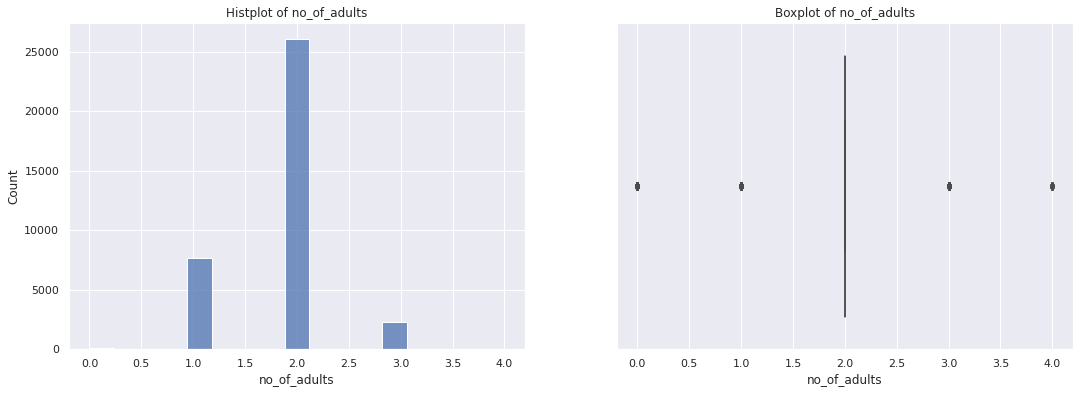

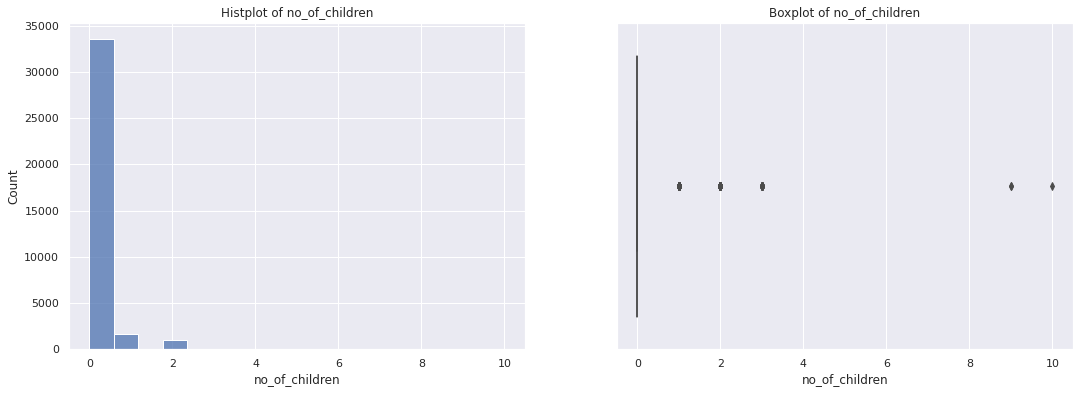

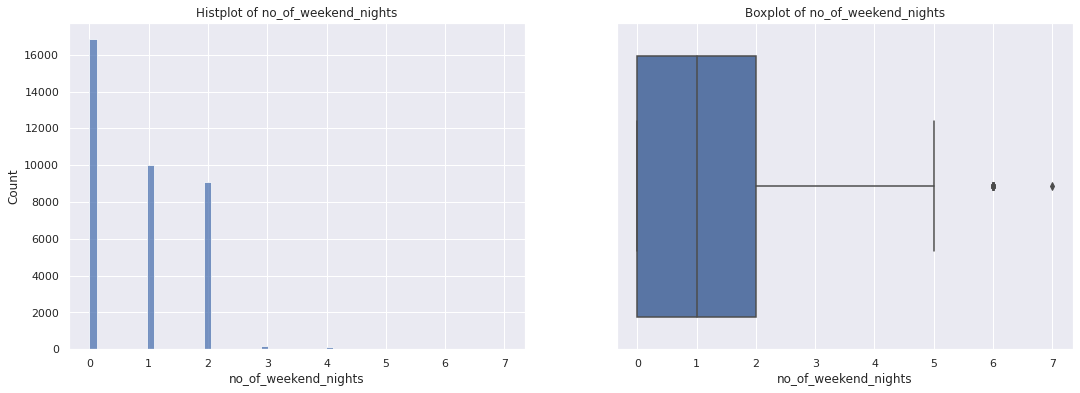

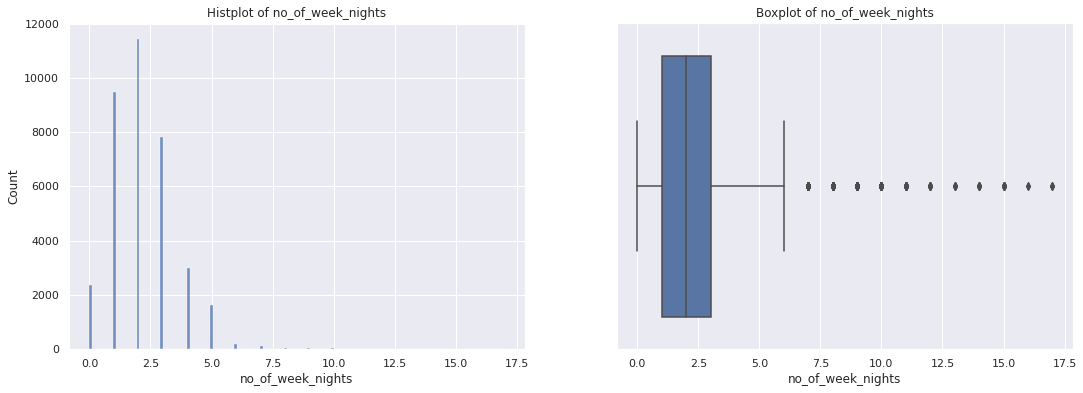

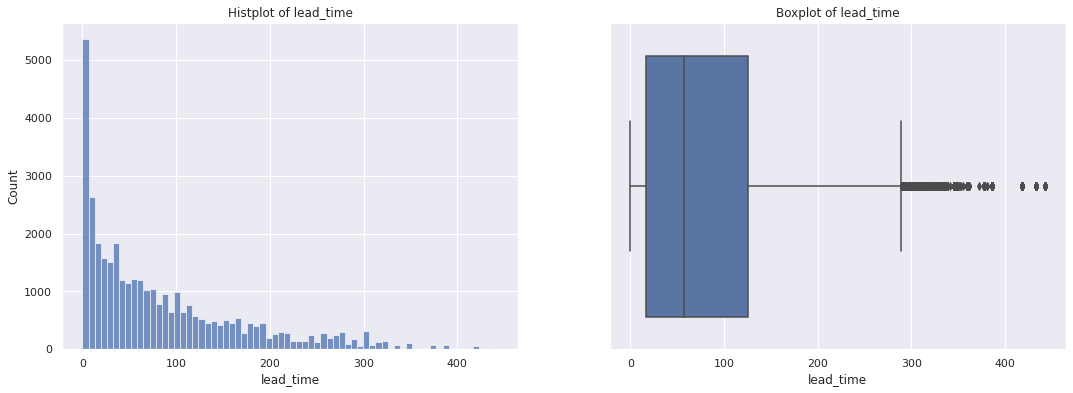

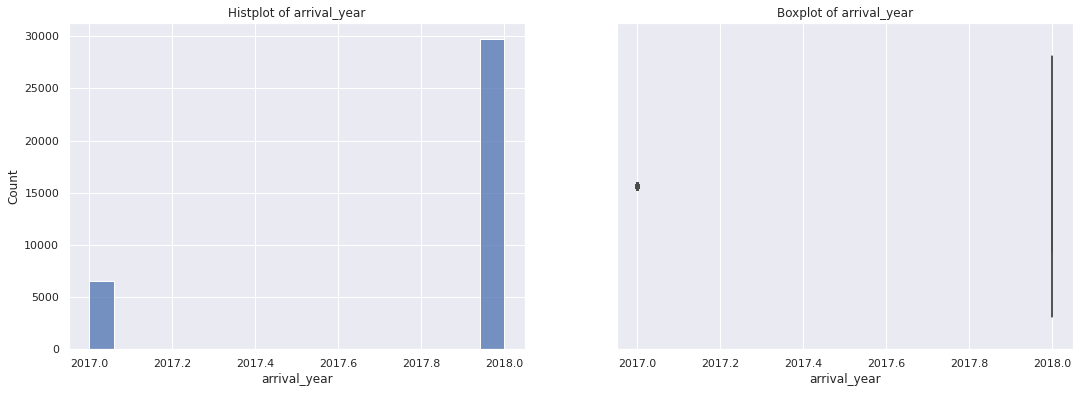

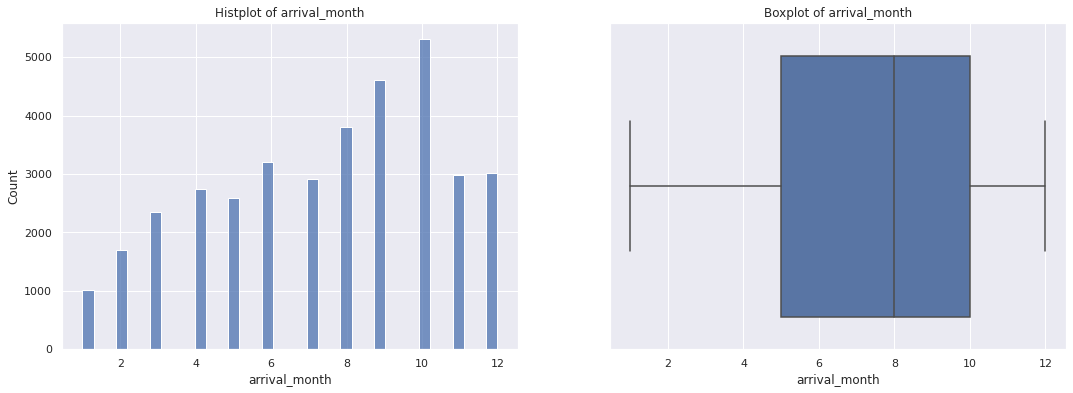

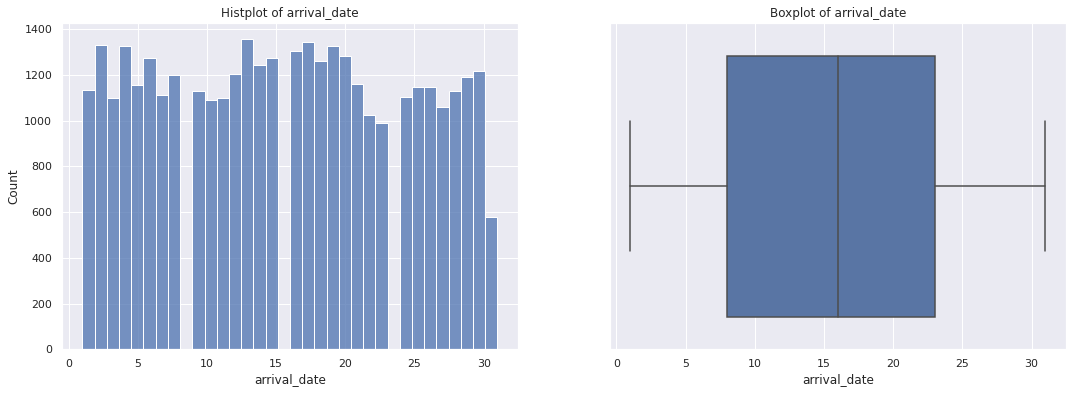

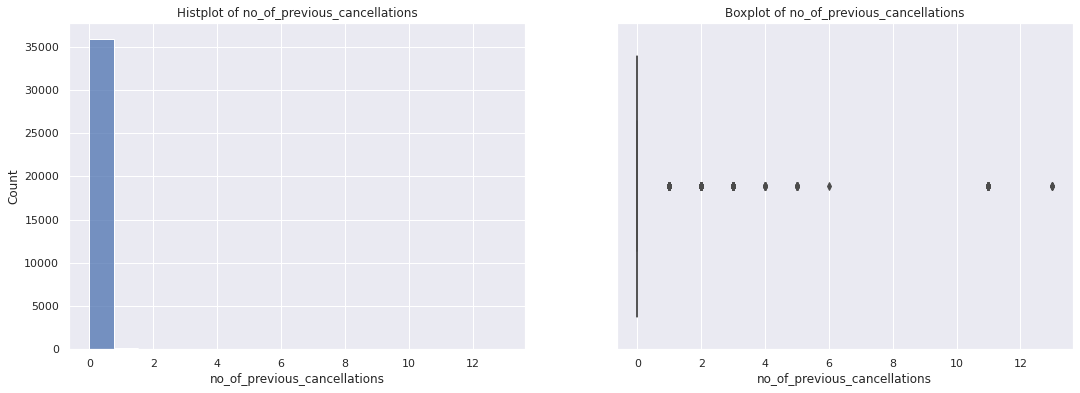

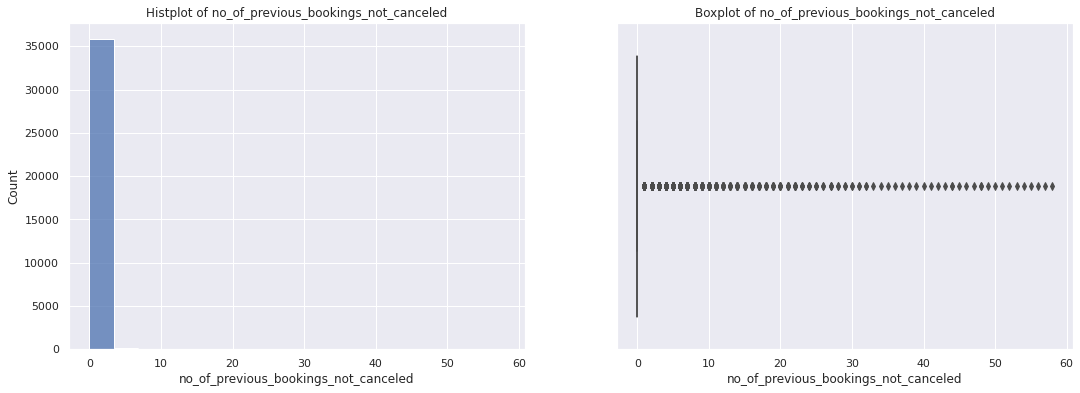

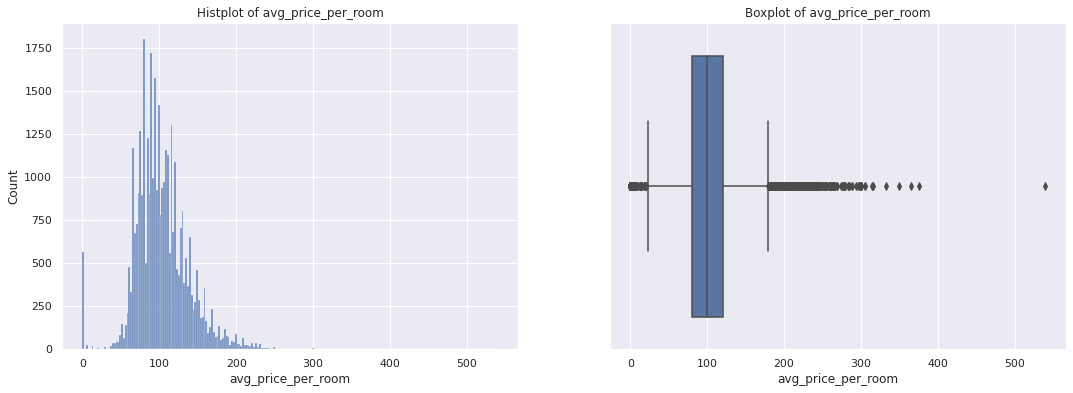

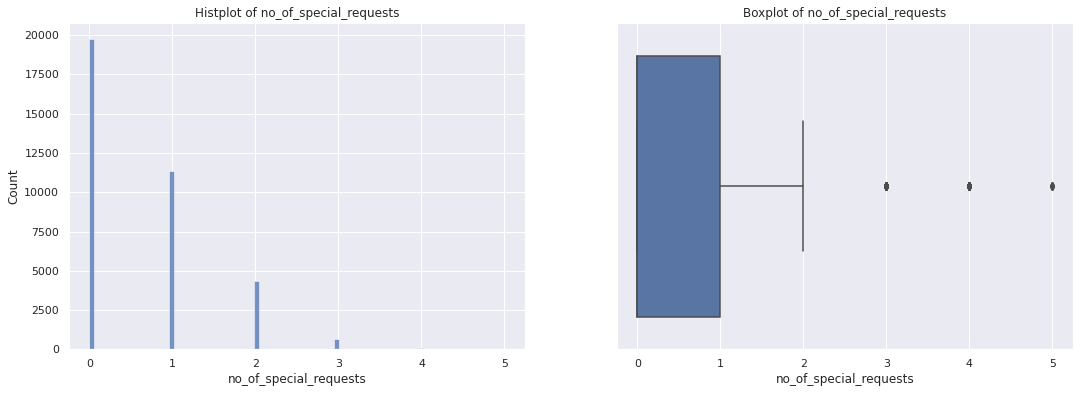

In [ ]:
numeric_variables_graphs,columns = generateNumericBoxPlotAndHist(df)


#### no_of_adults

In [ ]:
desbribeColumn(df,0)

Coluna no_of_adults:

Dados estatísticos: 

count    36275.000000
mean         1.844962
std          0.518715
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: no_of_adults, dtype: float64

 ---------- Column Count ----------- 


no_of_adults
2    26108
1     7695
3     2317
0      139
4       16
Name: no_of_adults, dtype: int64

 ------------ Percentage ------------- 


no_of_adults
2    71.972433
1    21.212957
3     6.387319
0     0.383184
4     0.044108
Name: no_of_adults, dtype: float64


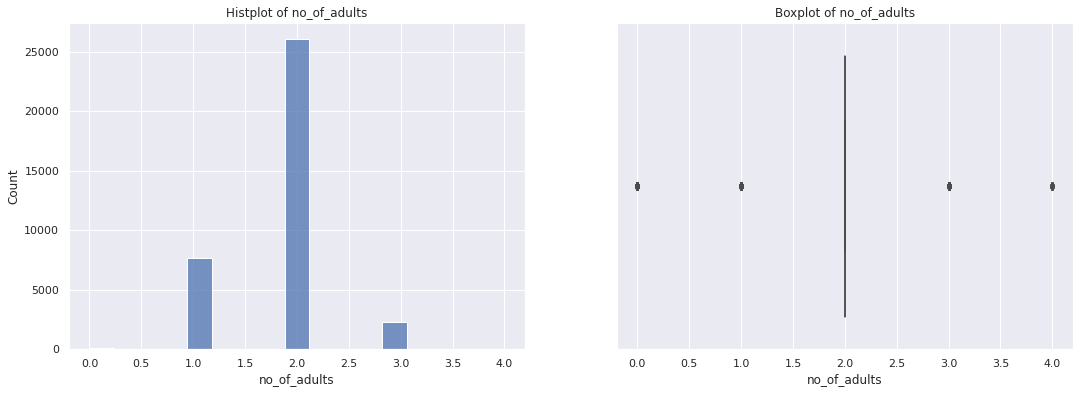

In [ ]:
numeric_variables_graphs['no_of_adults']

#### no_of_children

In [ ]:
desbribeColumn(df,1)

Coluna no_of_children:

Dados estatísticos: 

count    36275.000000
mean         0.105279
std          0.402648
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: no_of_children, dtype: float64

 ---------- Column Count ----------- 


no_of_children
0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64

 ------------ Percentage ------------- 


no_of_children
0     92.562371
1      4.460372
2      2.916609
3      0.052378
9      0.005513
10     0.002757
Name: no_of_children, dtype: float64


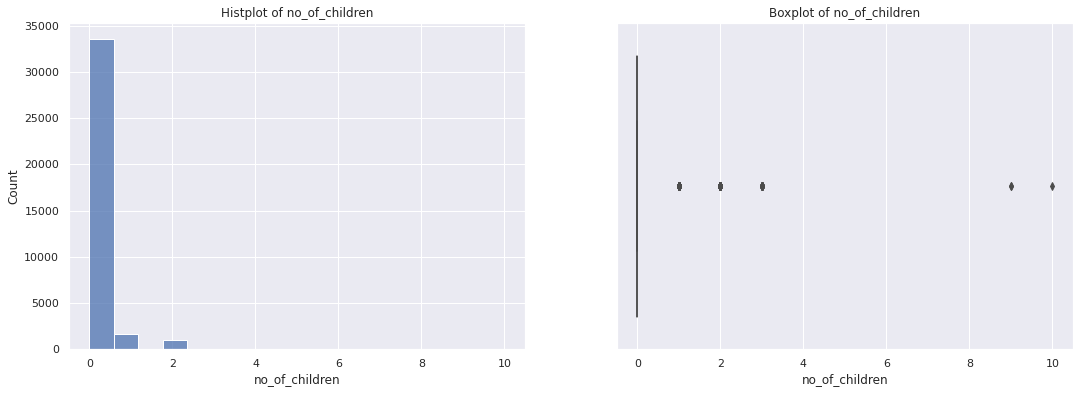

In [ ]:
numeric_variables_graphs['no_of_children']

#### no_of_weekend_nights

In [ ]:
desbribeColumn(df,2)

Coluna no_of_weekend_nights:

Dados estatísticos: 

count    36275.000000
mean         0.810724
std          0.870644
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: no_of_weekend_nights, dtype: float64

 ---------- Column Count ----------- 


no_of_weekend_nights
0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: no_of_weekend_nights, dtype: int64

 ------------ Percentage ------------- 


no_of_weekend_nights
0    46.511371
1    27.553411
2    25.006203
3     0.421778
4     0.355617
5     0.093728
6     0.055134
7     0.002757
Name: no_of_weekend_nights, dtype: float64


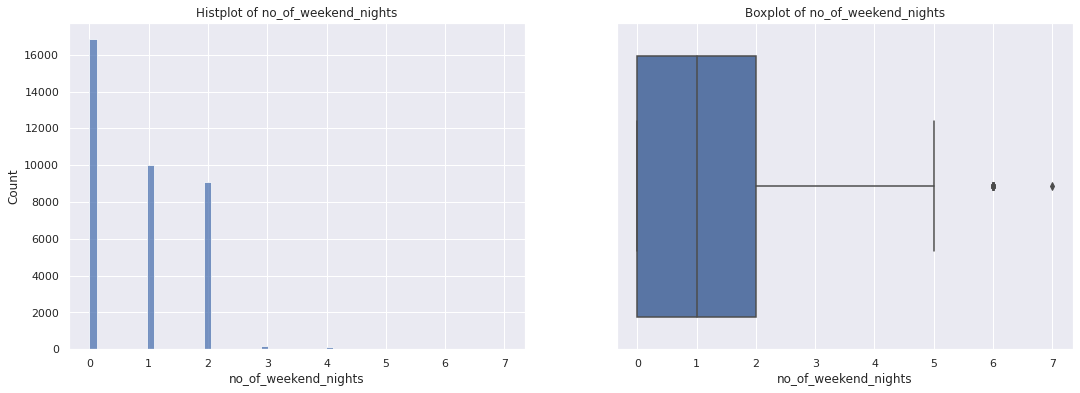

In [ ]:
numeric_variables_graphs['no_of_weekend_nights']

In [ ]:
df['no_of_weekend_nights'].value_counts()

0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: no_of_weekend_nights, dtype: int64

#### no_of_week_nights

In [ ]:
desbribeColumn(df,3)

Coluna no_of_week_nights:

Dados estatísticos: 

count    36275.000000
mean         2.204300
std          1.410905
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         17.000000
Name: no_of_week_nights, dtype: float64

 ---------- Column Count ----------- 


no_of_week_nights
2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: no_of_week_nights, dtype: int64

 ------------ Percentage ------------- 


no_of_week_nights
2     31.547898
1     26.155755
3     21.609924
4      8.242591
0      6.580289
5      4.449345
6      0.521020
7      0.311509
10     0.170917
8      0.170917
9      0.093728
11     0.046864
15     0.027567
12     0.024810
14     0.019297
13     0.013784
17     0.008270
16     0.005513
Name: no_of_week_nights, dtype: float64


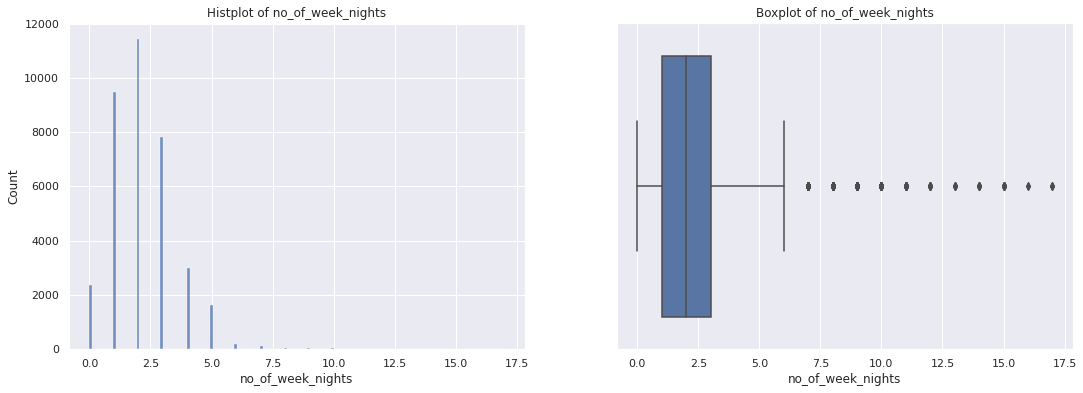

In [ ]:
numeric_variables_graphs['no_of_week_nights']

In [ ]:
df["no_of_week_nights"].value_counts()

2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: no_of_week_nights, dtype: int64

Podemos notar que esse gráfico possui uma distribuição que se assemelha a distribuição normal, apesar de possuir um desvio para direita. 

#### type_of_meal_plan

Apesar de não constar na documentação inicial, o criador do dataset [informou](https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset/discussion/379367) o que significa cada categoria da varíavel:

1. Not Selected (0) - Nenhum plano de alimentação foi escolhido;
2. Meal Plan 1 (1) - Apenas café da manhã;
3. Meal Plan 2 (2) - Café da manhã e almoço *ou* jantar;
4. Meal Plan 3 (3) - Café da manhã, almoço e jantar;



In [ ]:
desbribeColumn(df,4)

Coluna type_of_meal_plan:

Dados estatísticos: 

count     36275
unique        4
top           1
freq      27835
Name: type_of_meal_plan, dtype: int64

 ---------- Column Count ----------- 


type_of_meal_plan
1    27835
0     5130
2     3305
3        5
Name: type_of_meal_plan, dtype: int64

 ------------ Percentage ------------- 


type_of_meal_plan
1    76.733287
0    14.141971
2     9.110958
3     0.013784
Name: type_of_meal_plan, dtype: float64


#### required_car_parking_space

In [ ]:
desbribeColumn(df,5)

Coluna required_car_parking_space:

Dados estatísticos: 

count     36275
unique        2
top       False
freq      35151
Name: required_car_parking_space, dtype: object

 ---------- Column Count ----------- 


required_car_parking_space
False    35151
True      1124
Name: required_car_parking_space, dtype: int64

 ------------ Percentage ------------- 


required_car_parking_space
False    96.901447
True      3.098553
Name: required_car_parking_space, dtype: float64


#### room_type_reserved

In [ ]:
desbribeColumn(df,6)

Coluna room_type_reserved:

Dados estatísticos: 

count     36275
unique        7
top           1
freq      28130
Name: room_type_reserved, dtype: int64

 ---------- Column Count ----------- 


room_type_reserved
1    28130
4     6057
6      966
2      692
5      265
7      158
3        7
Name: room_type_reserved, dtype: int64

 ------------ Percentage ------------- 


room_type_reserved
1    77.546520
4    16.697450
6     2.662991
2     1.907650
5     0.730531
7     0.435562
3     0.019297
Name: room_type_reserved, dtype: float64


#### lead_time

In [ ]:
desbribeColumn(df,7)

Coluna lead_time:

Dados estatísticos: 

count    36275.000000
mean        85.232557
std         85.930817
min          0.000000
25%         17.000000
50%         57.000000
75%        126.000000
max        443.000000
Name: lead_time, dtype: float64

 ---------- Column Count ----------- 


lead_time
0      1297
1      1078
2       643
3       630
4       628
       ... 
351       1
350       1
348       1
300       1
355       1
Name: lead_time, Length: 352, dtype: int64

 ------------ Percentage ------------- 


lead_time
0      3.575465
1      2.971744
2      1.772571
3      1.736733
4      1.731220
         ...   
351    0.002757
350    0.002757
348    0.002757
300    0.002757
355    0.002757
Name: lead_time, Length: 352, dtype: float64


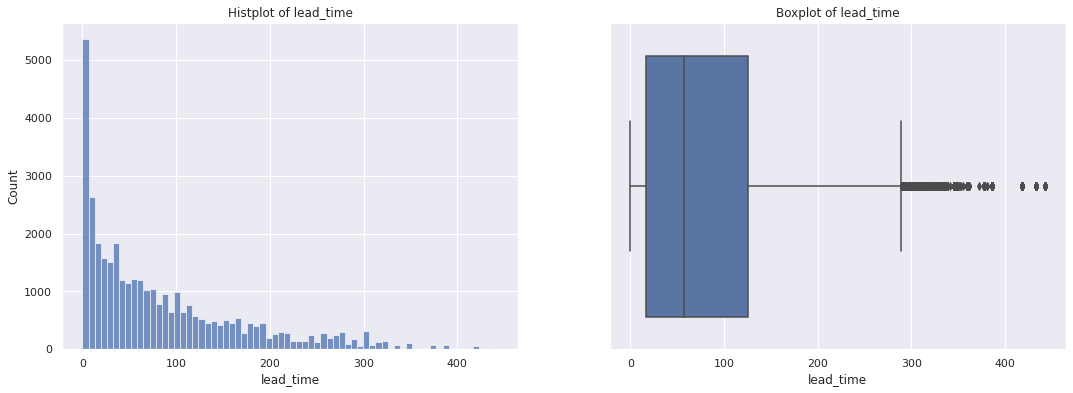

In [ ]:
numeric_variables_graphs['lead_time']

#### arrival_year

In [ ]:
desbribeColumn(df,8)

Coluna arrival_year:

Dados estatísticos: 

count    36275.000000
mean      2017.820427
std          0.383836
min       2017.000000
25%       2018.000000
50%       2018.000000
75%       2018.000000
max       2018.000000
Name: arrival_year, dtype: float64

 ---------- Column Count ----------- 


arrival_year
2018    29761
2017     6514
Name: arrival_year, dtype: int64

 ------------ Percentage ------------- 


arrival_year
2018    82.042729
2017    17.957271
Name: arrival_year, dtype: float64


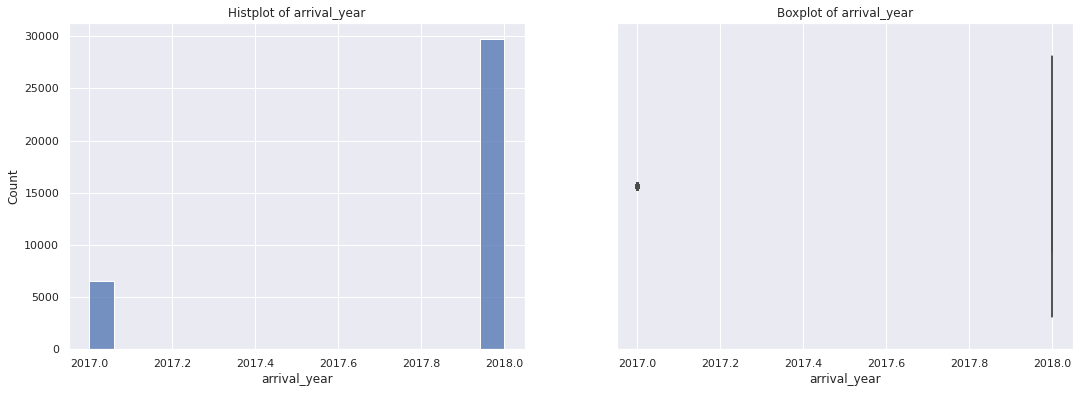

In [ ]:
numeric_variables_graphs['arrival_year']

Podemos ver que nosso dataset está muito desbalanceado para o ano de 2018

#### arrival_month

In [ ]:
desbribeColumn(df,9)

Coluna arrival_month:

Dados estatísticos: 

count    36275.000000
mean         7.423653
std          3.069894
min          1.000000
25%          5.000000
50%          8.000000
75%         10.000000
max         12.000000
Name: arrival_month, dtype: float64

 ---------- Column Count ----------- 


arrival_month
10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: arrival_month, dtype: int64

 ------------ Percentage ------------- 


arrival_month
10    14.657478
9     12.711234
8     10.511371
6      8.829773
12     8.328050
11     8.215024
7      8.049621
4      7.542385
5      7.161957
3      6.500345
2      4.697450
1      2.795314
Name: arrival_month, dtype: float64


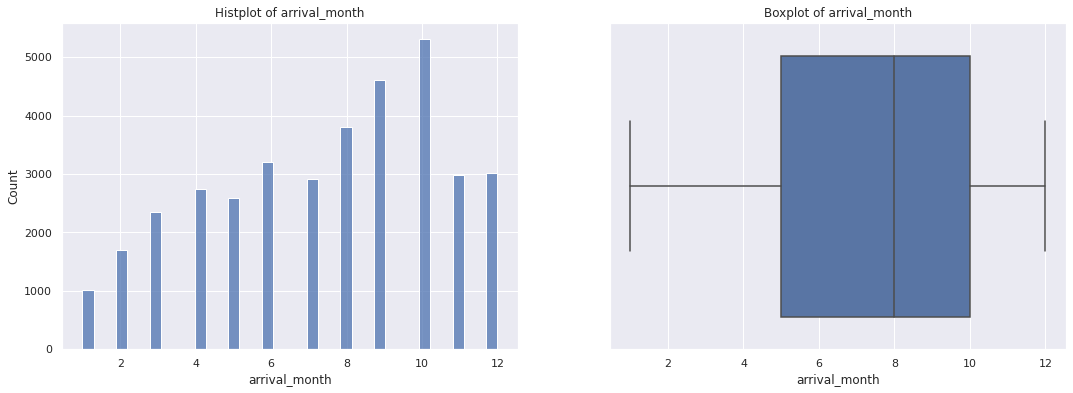

In [ ]:
numeric_variables_graphs['arrival_month']

Pelo carater temporal desta variável, é necessário analisar ela em conjunto ao ano de chegada, já que podemos ter um enviesamento em parte dos dados em certo ano.

#### arrival_date

In [ ]:
desbribeColumn(df,10)

Coluna arrival_date:

Dados estatísticos: 

count    36275.000000
mean        15.596995
std          8.740447
min          1.000000
25%          8.000000
50%         16.000000
75%         23.000000
max         31.000000
Name: arrival_date, dtype: float64

 ---------- Column Count ----------- 


arrival_date
13    1358
17    1345
2     1331
19    1327
4     1327
16    1306
20    1281
6     1273
15    1273
18    1260
14    1242
30    1216
12    1204
8     1198
29    1190
21    1158
5     1154
26    1146
25    1146
1     1133
9     1130
28    1129
7     1110
24    1103
11    1098
3     1098
10    1089
27    1059
22    1023
23     990
31     578
Name: arrival_date, dtype: int64

 ------------ Percentage ------------- 


arrival_date
13    3.743625
17    3.707788
2     3.669194
19    3.658167
4     3.658167
16    3.600276
20    3.531358
6     3.509304
15    3.509304
18    3.473467
14    3.423846
30    3.352171
12    3.319090
8     3.302550
29    3.280496
21    3.192281
5     3.181254
26    

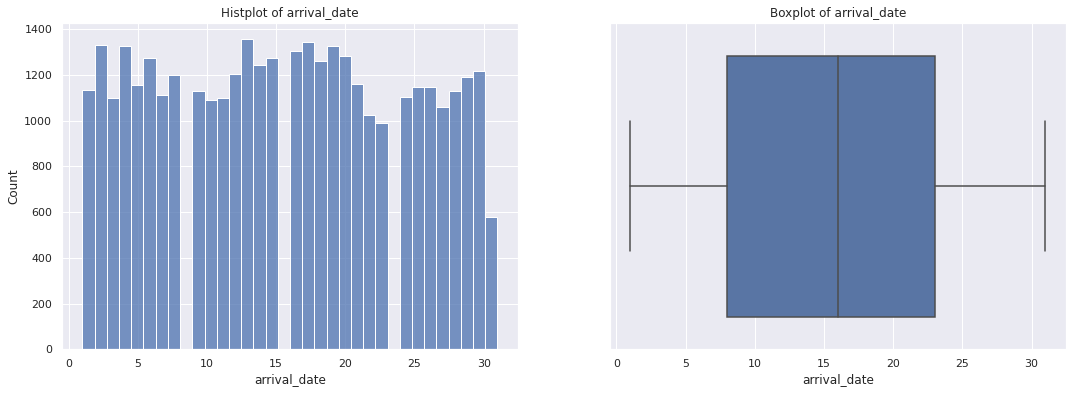

In [ ]:
numeric_variables_graphs['arrival_date']

#### market_segment_type

Da mesma forma em que a variável 'type_of_meal_plan', o criador do dataset [informou](https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset/discussion/388150) o que significa cada categoria da varíavel:

1. Offline (0) - Reserva feita pessoalmente pelo hóspede no hotel;
2. Online (1) - Reserva feita de forma online, independente do meio, pelo hóspede;
3. Corporate (2) - Reserva feita pela empresa em que o hóspede trabalha, independente do meio (presencial/online);
4. Aviation (3) - Reserva feita pela companhia aérea em que o hóspede trabalha, independente do meio (presencial/online);
5. Complementary (4) - Reserva complementar a uma reserva já realizada, indicando acompanhantes de viagem.
    
 

In [ ]:
desbribeColumn(df,11)

Coluna market_segment_type:

Dados estatísticos: 

count     36275
unique        5
top           1
freq      23214
Name: market_segment_type, dtype: int64

 ---------- Column Count ----------- 


market_segment_type
1    23214
0    10528
2     2017
4      391
3      125
Name: market_segment_type, dtype: int64

 ------------ Percentage ------------- 


market_segment_type
1    63.994487
0    29.022743
2     5.560303
4     1.077877
3     0.344590
Name: market_segment_type, dtype: float64


#### repeated_guest

In [ ]:
desbribeColumn(df,12)

Coluna repeated_guest:

Dados estatísticos: 

count     36275
unique        2
top       False
freq      35345
Name: repeated_guest, dtype: object

 ---------- Column Count ----------- 


repeated_guest
False    35345
True       930
Name: repeated_guest, dtype: int64

 ------------ Percentage ------------- 


repeated_guest
False    97.436251
True      2.563749
Name: repeated_guest, dtype: float64


#### no_of_previous_cancellations

In [ ]:
desbribeColumn(df,13)

Coluna no_of_previous_cancellations:

Dados estatísticos: 

count    36275.000000
mean         0.023349
std          0.368331
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         13.000000
Name: no_of_previous_cancellations, dtype: float64

 ---------- Column Count ----------- 


no_of_previous_cancellations
0     35937
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: no_of_previous_cancellations, dtype: int64

 ------------ Percentage ------------- 


no_of_previous_cancellations
0     99.068229
1      0.545830
2      0.126809
3      0.118539
11     0.068918
5      0.030324
4      0.027567
13     0.011027
6      0.002757
Name: no_of_previous_cancellations, dtype: float64


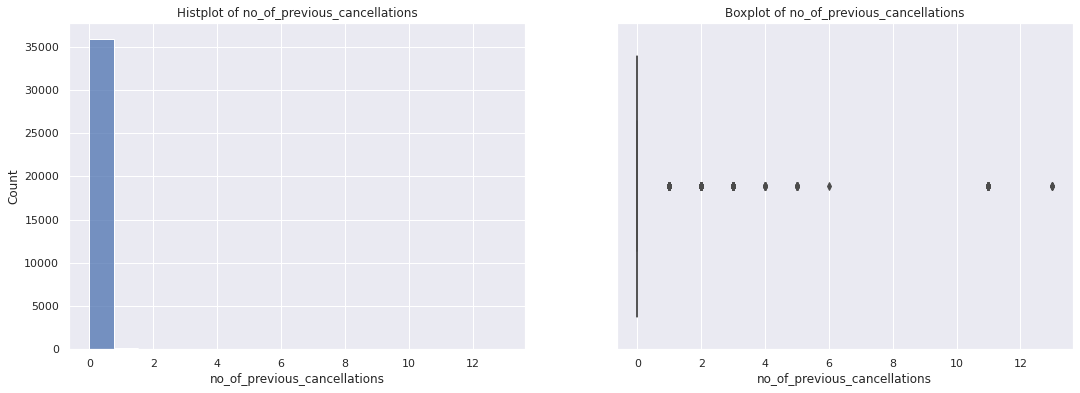

In [ ]:
numeric_variables_graphs['no_of_previous_cancellations']

#### no_of_previous_bookings_not_canceled

In [ ]:
desbribeColumn(df,14)

Coluna no_of_previous_bookings_not_canceled:

Dados estatísticos: 

count    36275.000000
mean         0.153411
std          1.754171
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         58.000000
Name: no_of_previous_bookings_not_canceled, dtype: float64

 ---------- Column Count ----------- 


no_of_previous_bookings_not_canceled
0     35463
1       228
2       112
3        80
4        65
5        60
6        36
7        24
8        23
9        19
10       19
11       15
12       12
14        9
15        8
16        7
13        7
17        6
18        6
19        6
20        6
21        6
22        6
23        3
24        3
25        3
27        3
31        2
48        2
44        2
32        2
29        2
30        2
26        2
28        2
46        1
57        1
56        1
55        1
54        1
53        1
52        1
51        1
50        1
49        1
47        1
45        1
33        1
43        1
42        1
41        1
40     

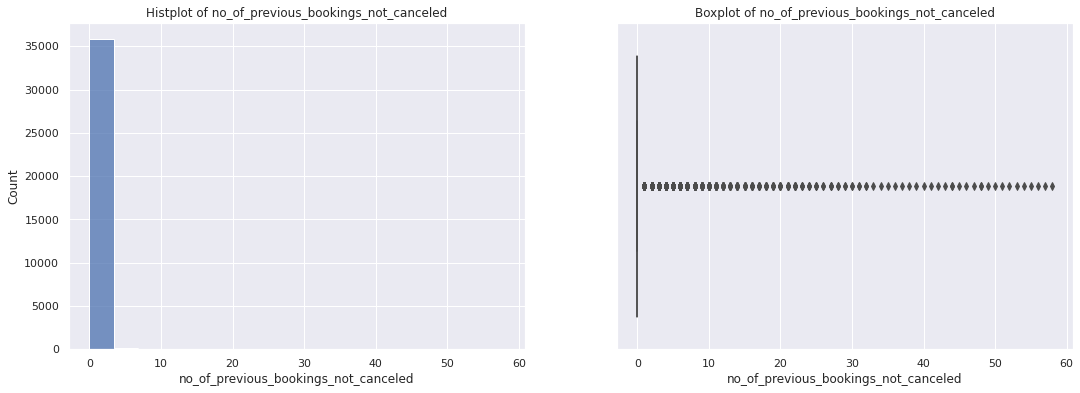

In [ ]:
numeric_variables_graphs['no_of_previous_bookings_not_canceled']

#### avg_price_per_room

In [ ]:
desbribeColumn(df,15)

Coluna avg_price_per_room:

Dados estatísticos: 

count    36275.000000
mean       103.423539
std         35.089424
min          0.000000
25%         80.300000
50%         99.450000
75%        120.000000
max        540.000000
Name: avg_price_per_room, dtype: float64

 ---------- Column Count ----------- 


avg_price_per_room
65.00     848
75.00     826
90.00     703
95.00     669
115.00    662
         ... 
104.39      1
104.42      1
104.43      1
104.48      1
540.00      1
Name: avg_price_per_room, Length: 3930, dtype: int64

 ------------ Percentage ------------- 


avg_price_per_room
65.00     2.337698
75.00     2.277050
90.00     1.937974
95.00     1.844245
115.00    1.824948
            ...   
104.39    0.002757
104.42    0.002757
104.43    0.002757
104.48    0.002757
540.00    0.002757
Name: avg_price_per_room, Length: 3930, dtype: float64


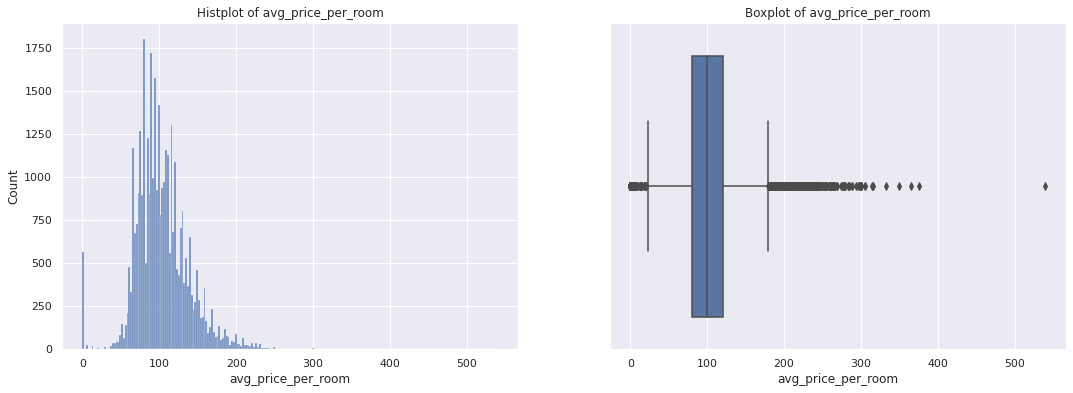

In [ ]:
numeric_variables_graphs['avg_price_per_room']

#### no_of_special_requests

In [ ]:
desbribeColumn(df,16)

Coluna no_of_special_requests:

Dados estatísticos: 

count    36275.000000
mean         0.619655
std          0.786236
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: no_of_special_requests, dtype: float64

 ---------- Column Count ----------- 


no_of_special_requests
0    19777
1    11373
2     4364
3      675
4       78
5        8
Name: no_of_special_requests, dtype: int64

 ------------ Percentage ------------- 


no_of_special_requests
0    54.519642
1    31.352171
2    12.030324
3     1.860786
4     0.215024
5     0.022054
Name: no_of_special_requests, dtype: float64


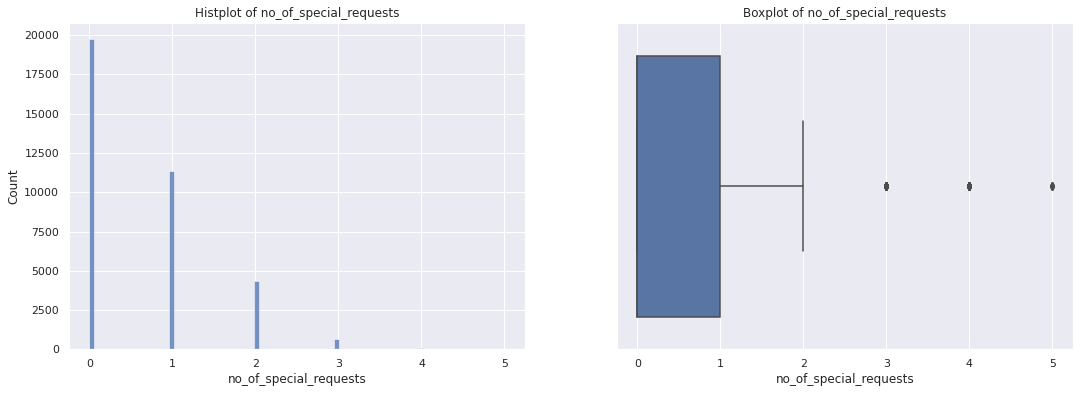

In [ ]:
numeric_variables_graphs['no_of_special_requests']

#### booking_canceled

O nome da variável foi alterado de 'booking_status' para 'booking_canceled' no intuito de refletir a alteração realizada para booleano.

In [ ]:
desbribeColumn(df,17)

Coluna booking_canceled:

Dados estatísticos: 

count     36275
unique        2
top       False
freq      24390
Name: booking_canceled, dtype: object

 ---------- Column Count ----------- 


booking_canceled
False    24390
True     11885
Name: booking_canceled, dtype: int64

 ------------ Percentage ------------- 


booking_canceled
False    67.236389
True     32.763611
Name: booking_canceled, dtype: float64


In [ ]:
#def Categorizator (dataframe):

    # Selecionar todas as variaveis categoricas
    #columns_categ = []
    #for column in df.columns:
        # todas as variaveis tipo 'object' menos o ID são categoricos
        #if   (df[column].dtypes == 'object') and (column != 'Booking_ID'):
            #columns_categ.append(column)



        # Existem colunas numericas que sao categoricas, como required_car_parking_space, 
        # imaginei que fossem as que tivessem o .unique == 2 e fossem numericos, mas aparentemente da erro
        #elif ((df[column].dtype == 'int64') or (df[column].dtype == 'float64')) and (len(df[column].unique() == 2)):
            #columns_categ.append(column)
        #else :
            #None
    # transforma os atributos categoricos selecionados em lista direto no df        
    #df[columns_categ] = df[columns_categ].astype('category')
    #return df, columns_categ

In [ ]:
#df[['repeated_guest','room_type_reserved','required_car_parking_space']].value_counts()

## Análise Bivariada

### Heatmap

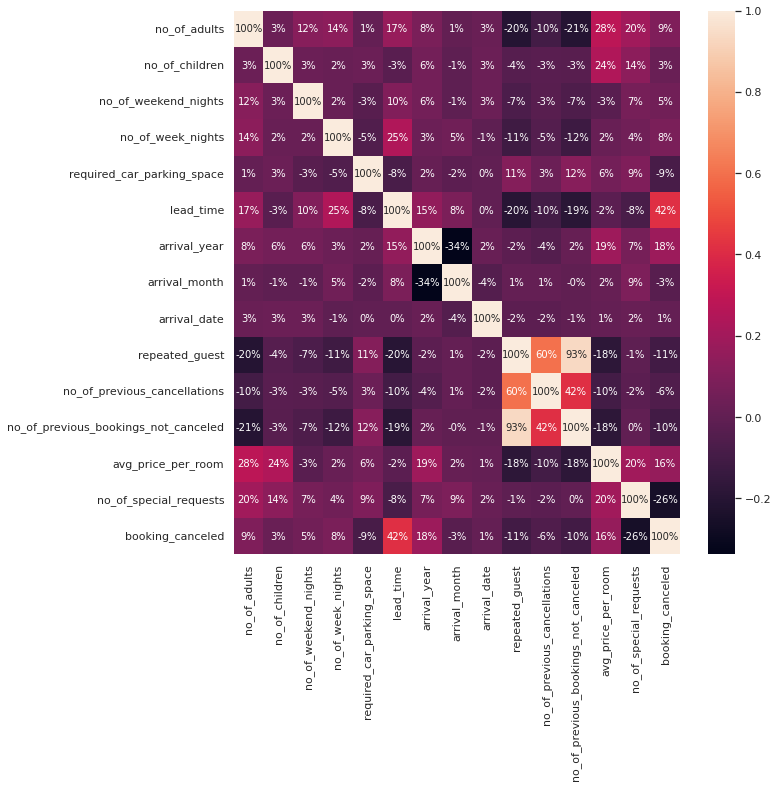

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(method='spearman'), annot=True, fmt='.0%')
plt.show()

Através do heatmap, é possível perceber uma correlação altíssima entre as variáveis **'no_of_previous_bookings_not_canceled'** e **'repeated_guest'** (`93%`), o que nos permite assumir o pensamento lógico de que hóspedes recorrentes (`1`) tendem a não canceler suas reservas, seja por benefícios atrelados à recorrência, sensação de pertencimento/identificação, etc.

In [ ]:
total_repeat = len(df[df['repeated_guest'] == True])
repeat_notcanceled = len(df[(df['repeated_guest'] == True)&(df['no_of_previous_bookings_not_canceled'] > 0)])
print('Existem',total_repeat,'hóspedes recorrentes no dataset e',repeat_notcanceled,'deles têm pelo menos uma reserva prévia não cancelada, representando um total de 87,31%.')

Existem 930 hóspedes recorrentes no dataset e 812 deles têm pelo menos uma reserva prévia não cancelada, representando um total de 87,31%.


Da mesma forma, a varíavel **'repeated_guest'** também possui uma alta correlação com **'no_of_previous_cancellations'** (`60%`), considerando que apenas hóspedes recorrentes têm registros de cancelamento de reservas.

In [ ]:
total_notrepeat = len(df[df['repeated_guest'] == False])
notrepeat_canceled = len(df[(df['repeated_guest'] == False)&(df['no_of_previous_cancellations'] != 0)])
print('Existem',total_notrepeat,'hóspedes de primeira viagem no dataset e',notrepeat_canceled,'deles têm pelo menos uma reserva prévia cancelada.')
total_repeat = len(df[df['repeated_guest'] == True])
repeat_canceled = len(df[(df['repeated_guest'] == True)&(df['no_of_previous_cancellations'] != 0)])
print('Existem',total_repeat,'hóspedes recorrentes no dataset e',repeat_canceled,'deles têm pelo menos uma reserva prévia cancelada, representando um total de 36,34%.')

Existem 35345 hóspedes de primeira viagem no dataset e 0 deles têm pelo menos uma reserva prévia cancelada.
Existem 930 hóspedes recorrentes no dataset e 338 deles têm pelo menos uma reserva prévia cancelada, representando um total de 36,34%.


Outra correlação interessante de se explorar é entre as variáveis 'lead_time' e 'booking_canceled' (`42%`), indicando que quanto maior o tempo entre a reserva e o check-in, maior a chance dela ser cancelada. Reservas de última hora, considerando o primeiro quartil, tem apenas 11% de cancelamento, reforçando o argumento anterior.

In [ ]:
plan_lead = len(df[df['lead_time'] >= 86]) #valor médio indicado na análise individual da variável
plan_canceled = len(df[(df['lead_time'] >= 86)&(df['booking_canceled'] == True)])
print('Existem',plan_lead,'reservas feitas com 86 ou mais dias de antecedencia,',plan_canceled,'foram canceladas (cerca de 55%).')
notplan_lead = len(df[df['lead_time'] <= 85]) #valor médio indicado na análise individual da variável
notplan_canceled = len(df[(df['lead_time'] <= 85)&(df['booking_canceled'] == True)])
print('Existem',notplan_lead,'reservas feitas com 85 ou menos dias de antecedencia,',notplan_canceled,'foram canceladas (cerca de 19%).')
last_call = len(df[df['lead_time'] <= 17]) #valor do primeiro quartil indicado na análise individual da variável
lastcall_canceled = len(df[(df['lead_time'] <= 17)&(df['booking_canceled'] == True)])
print('Existem',last_call,'reservas dfeitas com 17 ou menos dias de antecedencia,',lastcall_canceled,'foram canceladas (cerca de 11%).')


Existem 13725 reservas feitas com 86 ou mais dias de antecedencia, 7553 foram canceladas (cerca de 55%).
Existem 22550 reservas feitas com 85 ou menos dias de antecedencia, 4332 foram canceladas (cerca de 19%).
Existem 9226 reservas dfeitas com 17 ou menos dias de antecedencia, 1086 foram canceladas (cerca de 11%).


In [ ]:
def createNumericGraphForTarget(df:pd.DataFrame,target:str):
    df1 = df.select_dtypes([int, float])
    columns = df1.columns
    df1[target] = df[target].astype("category")
    numeric_variables_graphs_booking_canceled =  {}
    plt.figure(figsize=(80, 60), dpi=80)
    for i, column in enumerate(columns):
        fig, ax = plt.subplots(1,2,figsize=(18, 6))
        sns.histplot(ax=ax[0],data=df1, x=column, hue=target,hue_order=[True,False],shrink=.8,multiple="dodge",bins=30,color='red',kde=True).set(title = "Histplot of " + column)
        sns.boxplot(data=df1,x=column, y=target,hue=target,hue_order=[True,False])  
        numeric_variables_graphs_booking_canceled[column] = fig
    return numeric_variables_graphs_booking_canceled,columns

In [ ]:
def createCategoricalGraphForTarget(df,target):
    df1 = df.select_dtypes(['category'])
    columns = df1.columns
    df1[target] = df[target].astype("category")
    category_variables_graphs_per_target =  {}
    plt.figure(figsize=(80, 60), dpi=80)
    for i, column in enumerate(columns):
        fig, ax = plt.subplots(1,1,figsize=(9, 6))
        sns.histplot(data=df1, x=column, hue=target,hue_order=[True,False],shrink=.8,multiple="dodge",bins=30,color='red',kde=True).set(title = "Histplot of " + column)
        category_variables_graphs_per_target[column] = fig
    return category_variables_graphs_per_target,columns

In [ ]:
def createTableForTarget(df,target:str):
    df1 = df.select_dtypes([int,float,'category'])
    columns = df1.columns
    df1[target] = df[target].astype("category")
    category_variables_tables_per_target=  {}
    plt.figure(figsize=(80, 60), dpi=80)
    for i, column in enumerate(columns):
        grouped = df.groupby([column])[target].value_counts()
        percentages = (grouped / grouped.groupby(level=0).sum()) * 100
        category_variables_tables_per_target[column] = percentages.to_frame()
    return category_variables_tables_per_target, columns

### Mês de chegada por ano

[Text(0.5, 1.0, 'Histplot of arrival_month')]

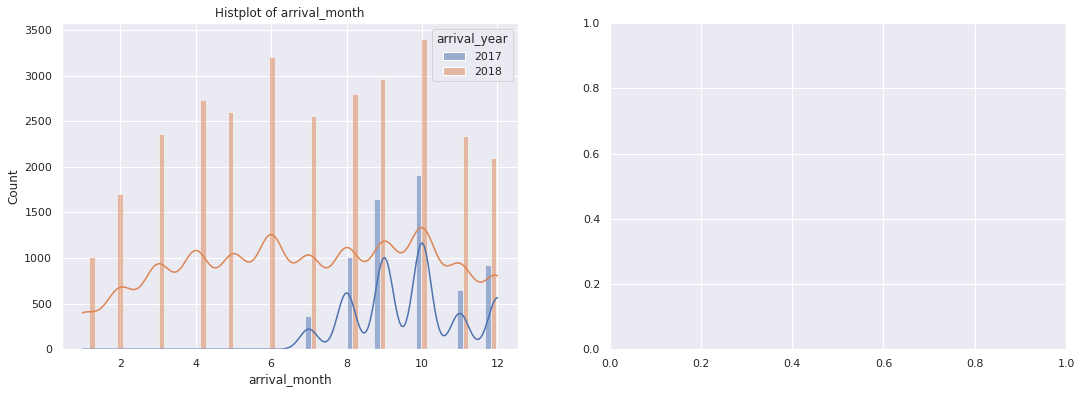

In [ ]:
df1 = df.copy()
df1['arrival_year'] = df1['arrival_year'].astype("category")
fig, ax = plt.subplots(1,2,figsize=(18, 6))
sns.histplot(ax=ax[0],data=df1, x='arrival_month',hue='arrival_year',shrink=.8,multiple="dodge",bins=30,color='red',kde=True).set(title = "Histplot of " + 'arrival_month')


### Análise bivariada com o target

<Figure size 6400x4800 with 0 Axes>

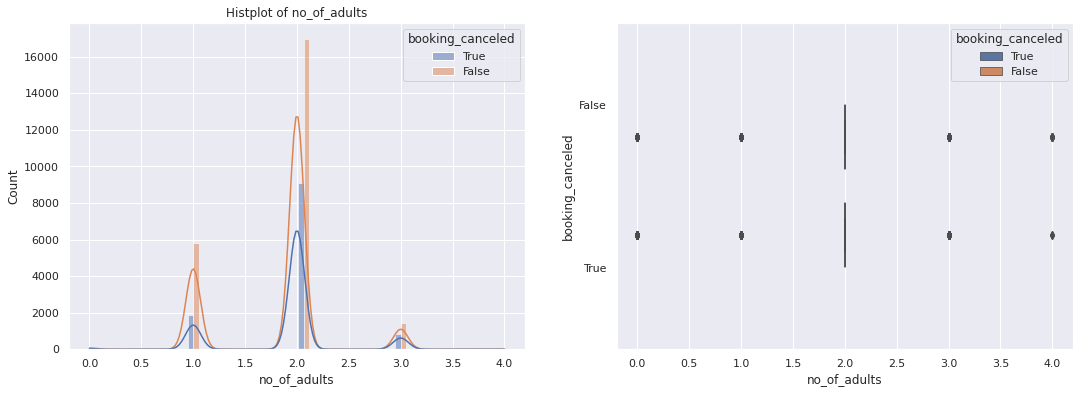

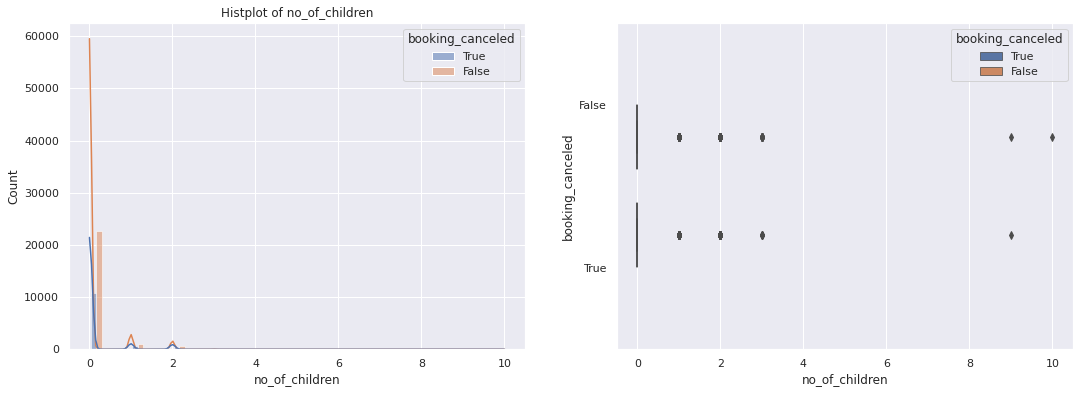

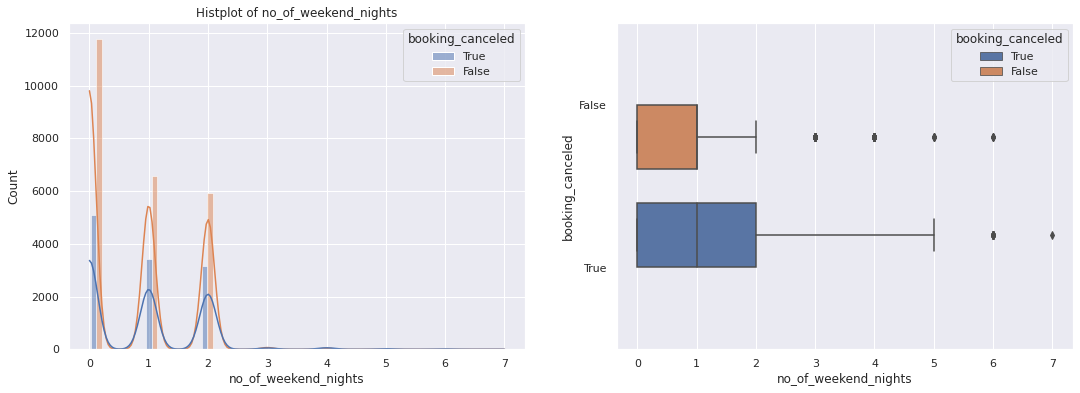

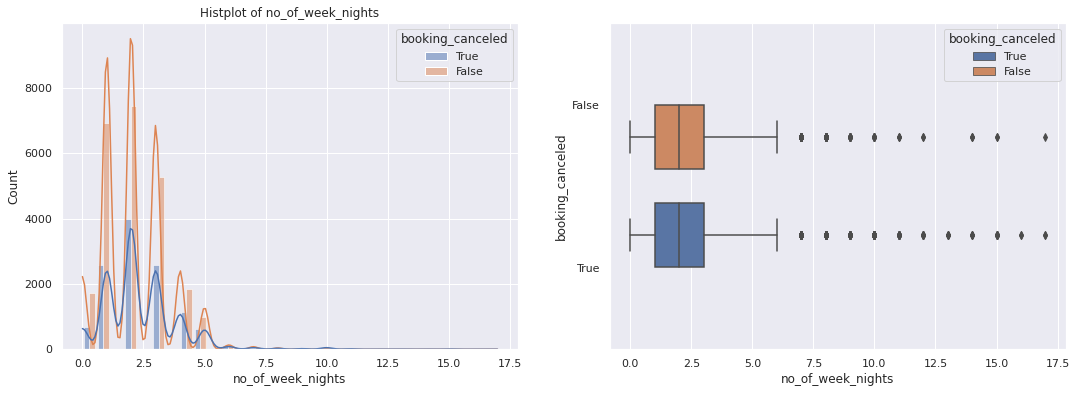

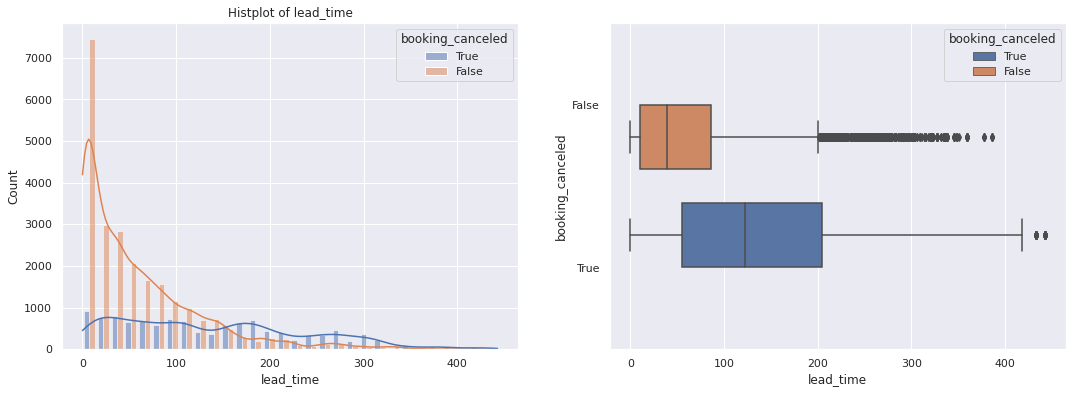

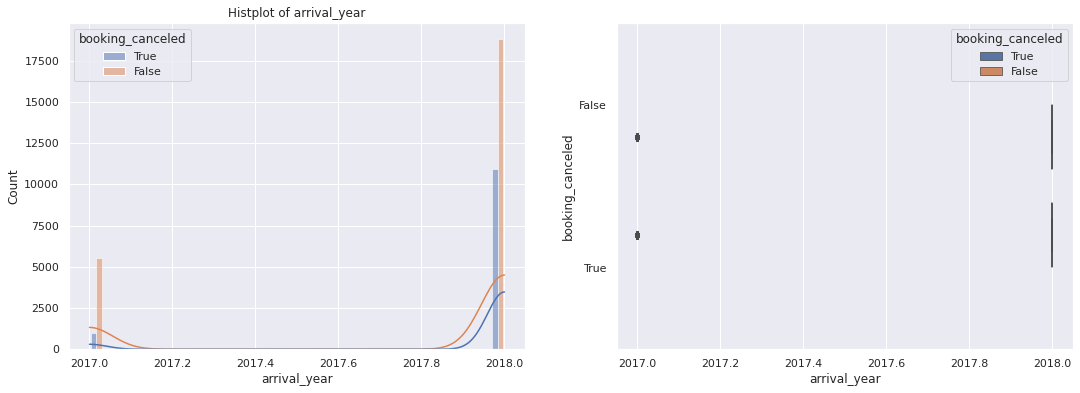

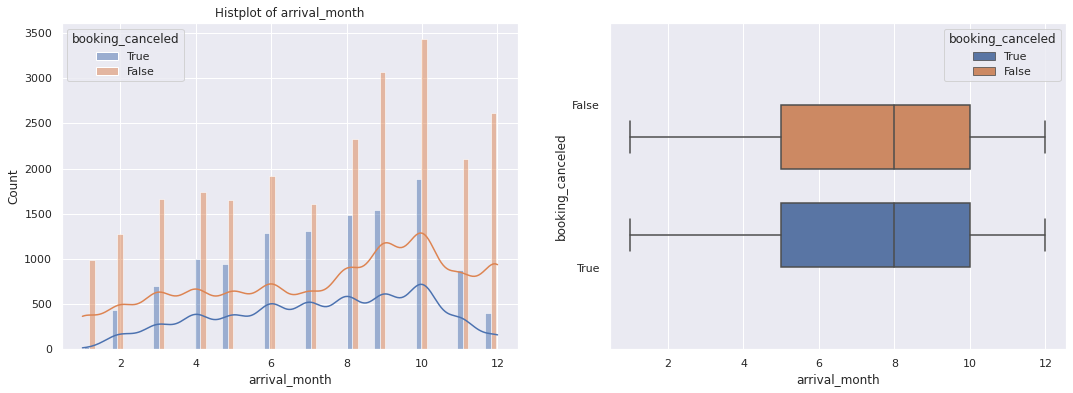

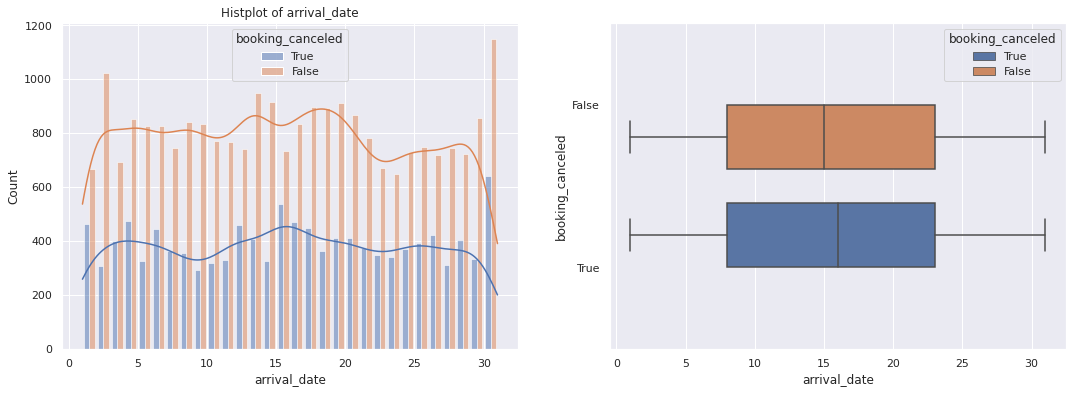

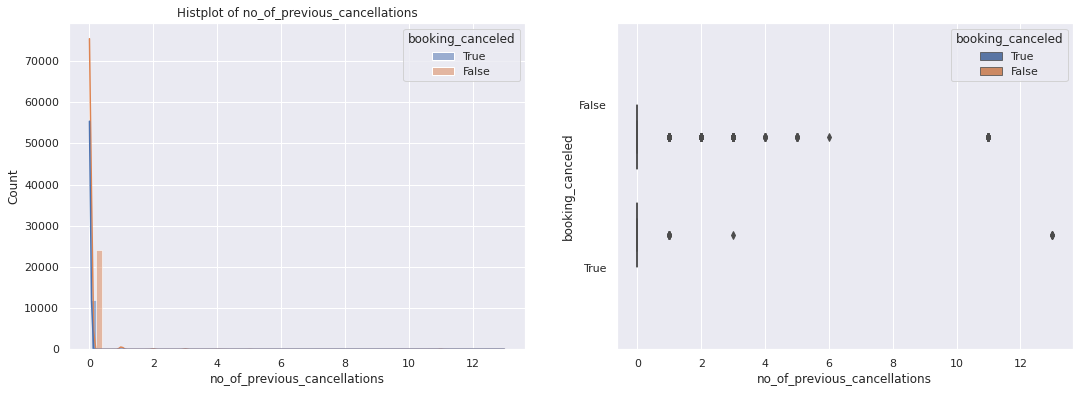

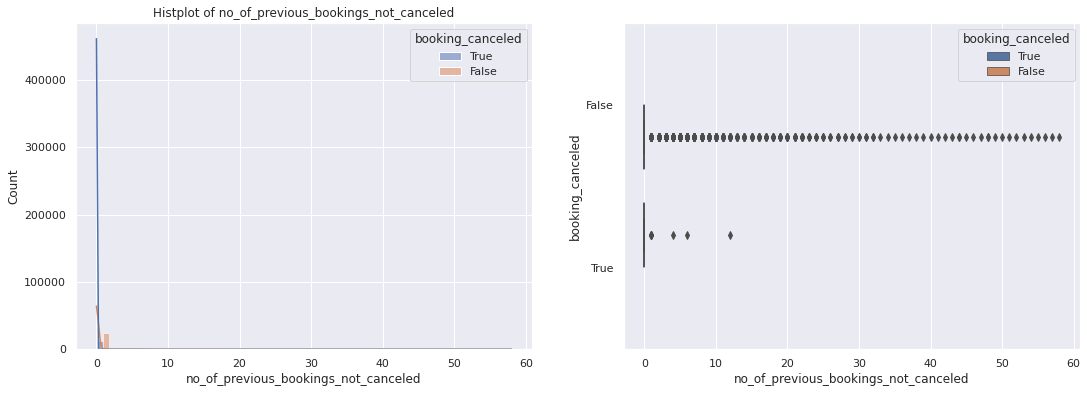

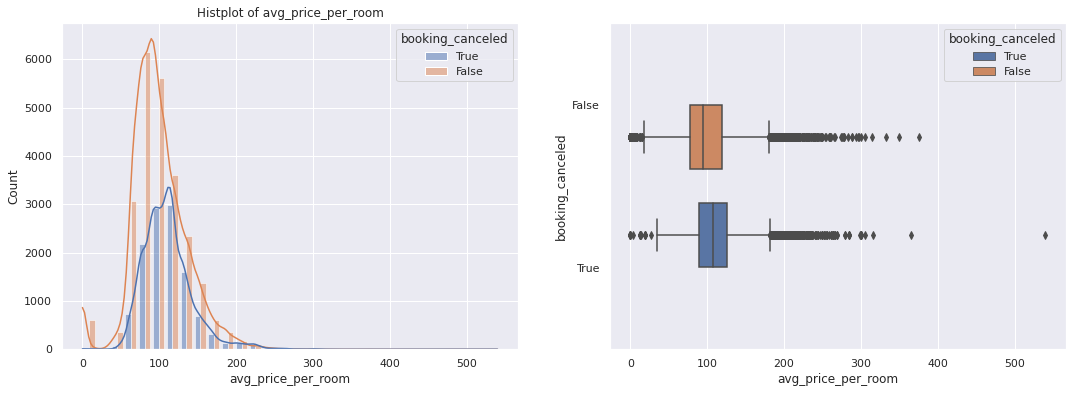

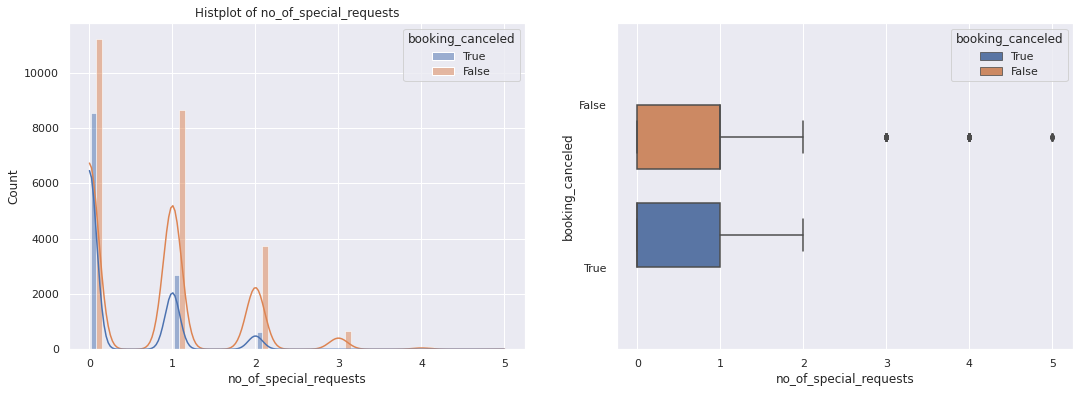

In [ ]:
numeric_variables_graphs_booking_canceled,columns = createNumericGraphForTarget(df,'booking_canceled')

<Figure size 6400x4800 with 0 Axes>

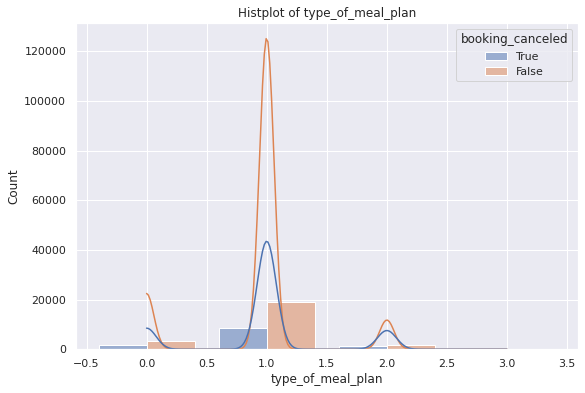

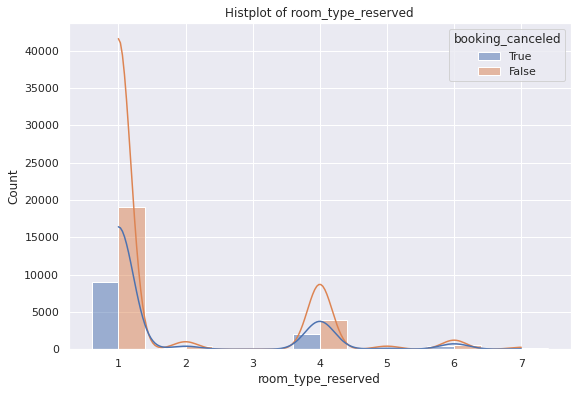

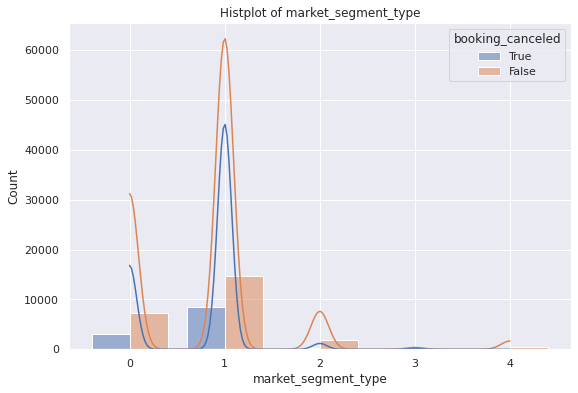

In [ ]:
categorical_variables_graphs_booking_canceled,columns = createCategoricalGraphForTarget(df,'booking_canceled')

In [ ]:
columns

Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'], dtype='object')

In [ ]:
category_variables_tables_per_target, columns = createTableForTarget(df,'booking_canceled')

<Figure size 6400x4800 with 0 Axes>

### no_of_adults vs booking_canceled

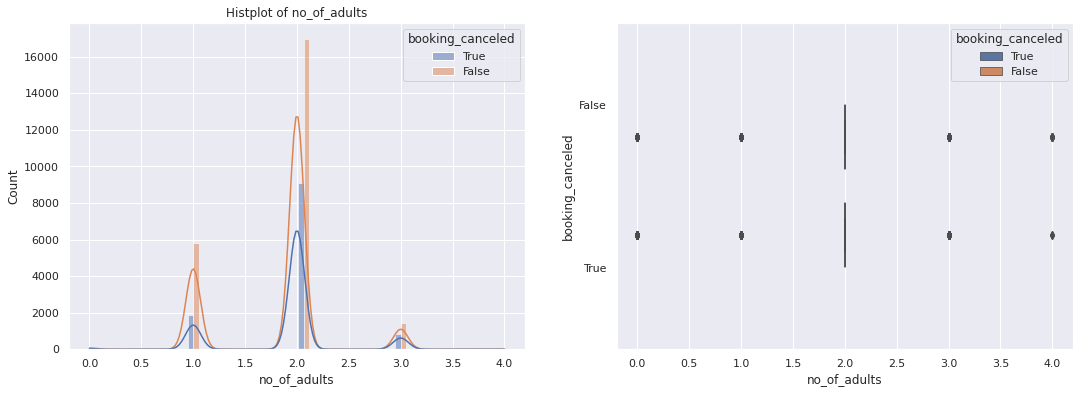

In [ ]:
numeric_variables_graphs_booking_canceled['no_of_adults']

In [ ]:
category_variables_tables_per_target['no_of_adults']

booking_canceled
no_of_adults booking_canceled                  
0            False                    68.345324
             True                     31.654676
1            False                    75.880442
             True                     24.119558
2            False                    65.072009
             True                     34.927991
3            False                    62.753561
             True                     37.246439
4            False                    81.250000
             True                     18.750000

In [ ]:
df['no_of_adults'].value_counts()

2    26108
1     7695
3     2317
0      139
4       16
Name: no_of_adults, dtype: int64

In [ ]:
df1 = df.copy()
df1['no_of_adults'] = pd.cut(df['no_of_adults'],[0,1,2,1000], right=True, labels=['0-1','2','3+'], retbins=True, precision=3, include_lowest=True, duplicates='raise', ordered=True)[0]
df1.groupby(['no_of_adults'])['booking_canceled'].value_counts().to_frame()

booking_canceled
no_of_adults booking_canceled                  
0-1          False                         5934
             True                          1900
2            False                        16989
             True                          9119
3+           False                         1467
             True                           866

In [ ]:

print("Porcentagem de cancelamentos por no_of_adults")
print("-----------------------------------------------")
(df1.groupby(['no_of_adults'])['booking_canceled'].sum()/df1.groupby(['no_of_adults'])['booking_canceled'].count())*100

Porcentagem de cancelamentos por no_of_adults
-----------------------------------------------


no_of_adults
0-1    24.253255
2      34.927991
3+     37.119589
Name: booking_canceled, dtype: Float64

### no_of_children vs booking_canceled

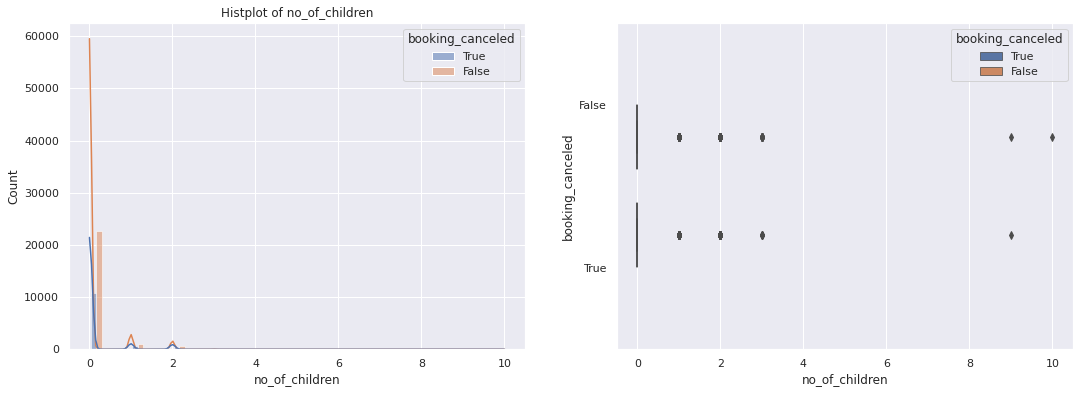

In [ ]:
numeric_variables_graphs_booking_canceled[ 'no_of_children']


{'no_of_children': <Figure size 1296x432 with 2 Axes>}

<Figure size 6400x4800 with 0 Axes>

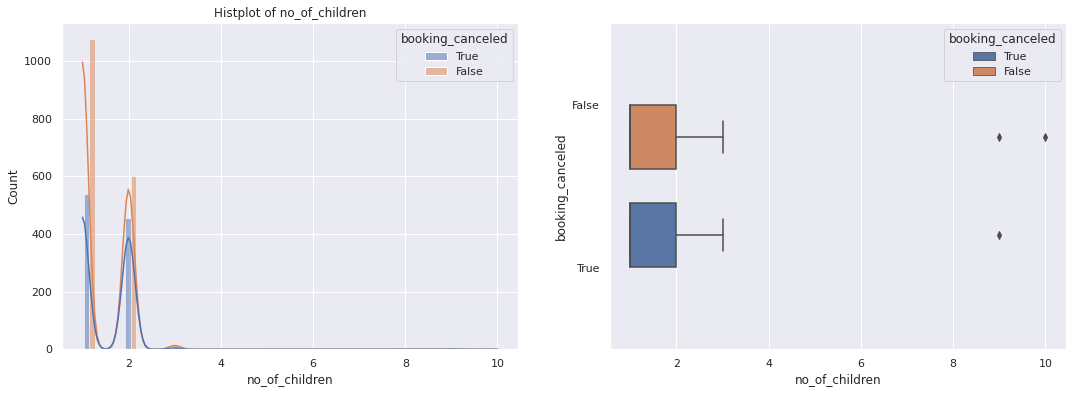

In [ ]:
df1 = df[df['no_of_children']>0][['no_of_children','booking_canceled']]
createNumericGraphForTarget(df1,'booking_canceled')[0]

In [ ]:
category_variables_tables_per_target['no_of_children']

booking_canceled
no_of_children booking_canceled                  
0              False                    67.590910
               True                     32.409090
1              False                    66.625464
               True                     33.374536
2              False                    56.805293
               True                     43.194707
3              False                    73.684211
               True                     26.315789
9              False                    50.000000
               True                     50.000000
10             False                   100.000000

In [ ]:
df['no_of_children'].value_counts()

0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64

A quantidade de dados para pessoas com +2 crianças é irrisória, não fazendo sentido analisar eles separadamente.

In [ ]:
df1 = df.copy()
df1['no_of_children'] = pd.cut(df['no_of_children'],[0,0.9,1,1000], right=True, labels=['0','1','+2'], retbins=True, precision=3, include_lowest=True, duplicates='raise', ordered=True)[0]
df1.groupby(['no_of_children'])['booking_canceled'].value_counts().to_frame()

booking_canceled
no_of_children booking_canceled                  
0              False                        22695
               True                         10882
1              False                         1078
               True                           540
+2             False                          617
               True                           463

In [ ]:

print("Porcentagem de cancelamentos por no_of_children")
print("-----------------------------------------------")
(df1.groupby(['no_of_children'])['booking_canceled'].sum()/df1.groupby(['no_of_children'])['booking_canceled'].count())*100

Porcentagem de cancelamentos por no_of_children
-----------------------------------------------


no_of_children
0      32.40909
1     33.374536
+2     42.87037
Name: booking_canceled, dtype: Float64

Podemos ver que a taxa de cancelamentos aumenta com o número de crianças.

### no_of_weekend_nights vs booking_canceled

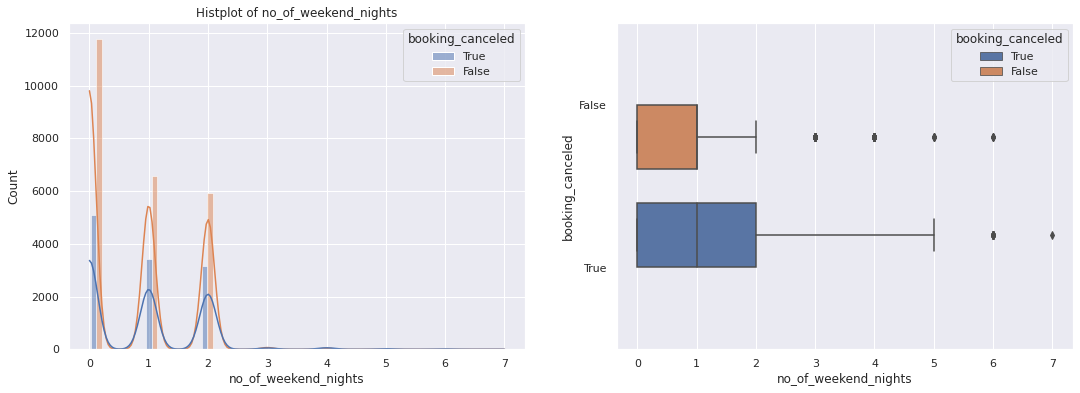

In [ ]:
numeric_variables_graphs_booking_canceled['no_of_weekend_nights']


{'no_of_weekend_nights': <Figure size 1296x432 with 2 Axes>}

<Figure size 6400x4800 with 0 Axes>

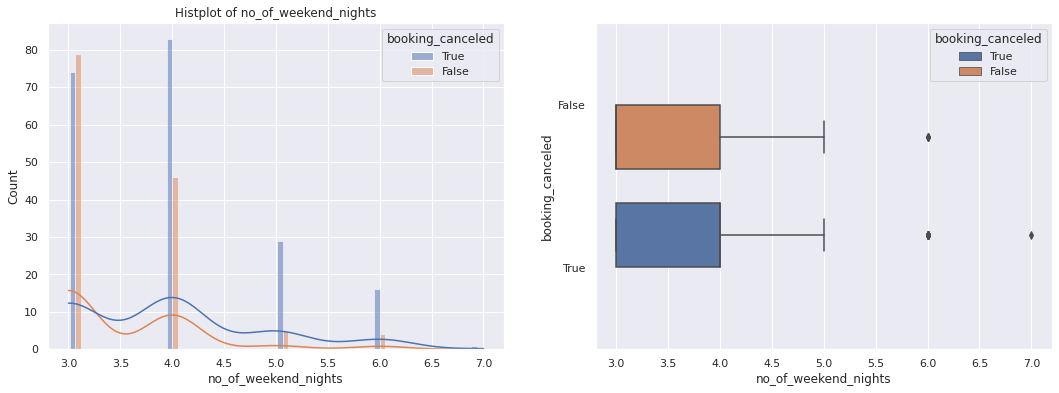

In [ ]:
df1 = df[df['no_of_weekend_nights']>2][['no_of_weekend_nights','booking_canceled']]
createNumericGraphForTarget(df1,'booking_canceled')[0]

Através do gráfico é possível concluir que a taxa de cancelamento a partir da quarta noite de fim de semana passa a ser maior que 50%.

In [ ]:
category_variables_tables_per_target['no_of_weekend_nights']

booking_canceled
no_of_weekend_nights booking_canceled                  
0                    False                    69.813893
                     True                     30.186107
1                    False                    65.662831
                     True                     34.337169
2                    False                    65.196781
                     True                     34.803219
3                    False                    51.633987
                     True                     48.366013
4                    True                     64.341085
                     False                    35.658915
5                    True                     85.294118
                     False                    14.705882
6                    True                     80.000000
                     False                    20.000000
7                    True                    100.000000

In [ ]:
df['no_of_weekend_nights'].value_counts()

0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: no_of_weekend_nights, dtype: int64

Apersar de 7 noites de fim de semana possuir 100% de cancelamento, apenas 1 cliente se encaixa nessa categoria, sendo muito pouco para tirarmos qualquer conclusão.

In [ ]:
df1 = df.copy()
df1['no_of_weekend_nights'] = pd.cut(df['no_of_weekend_nights'],[0,0.9,1,2,1000], right=True, labels=['0','1','2','3+'], retbins=True, precision=3, include_lowest=True, duplicates='raise', ordered=True)[0]
df1.groupby(['no_of_weekend_nights'])['booking_canceled'].value_counts().to_frame()

booking_canceled
no_of_weekend_nights booking_canceled                  
0                    False                        11779
                     True                          5093
1                    False                         6563
                     True                          3432
2                    False                         5914
                     True                          3157
3+                   True                           203
                     False                          134

In [ ]:
print("Porcentagem de cancelamentos por no_of_weekend_nights")
print("-----------------------------------------------")
(df1.groupby(['no_of_weekend_nights'])['booking_canceled'].sum()/df1.groupby(['no_of_weekend_nights'])['booking_canceled'].count())*100

Porcentagem de cancelamentos por no_of_weekend_nights
-----------------------------------------------


no_of_weekend_nights
0     30.186107
1     34.337169
2     34.803219
3+    60.237389
Name: booking_canceled, dtype: Float64

Podemos concluir que o aumento de noites de fim de semana aumenta a change de cancelamento.

### no_of_week_nights vs booking_canceled

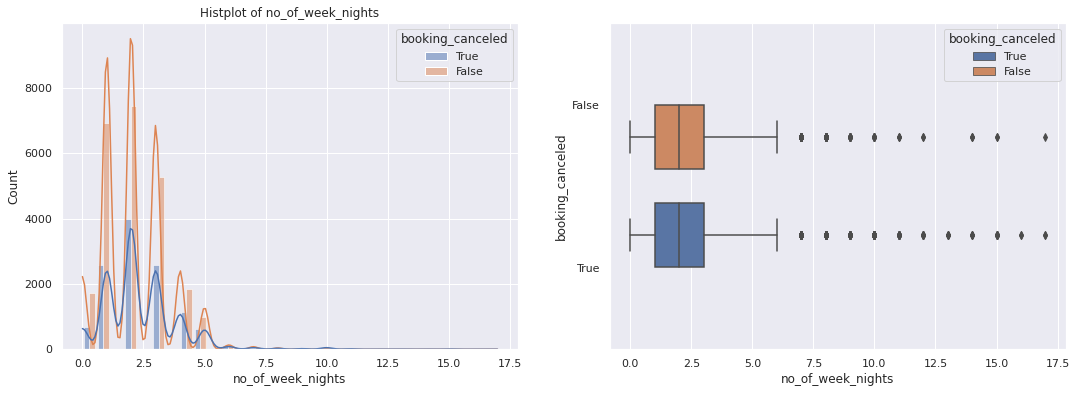

In [ ]:
numeric_variables_graphs_booking_canceled['no_of_week_nights']


{'no_of_week_nights': <Figure size 1296x432 with 2 Axes>}

<Figure size 6400x4800 with 0 Axes>

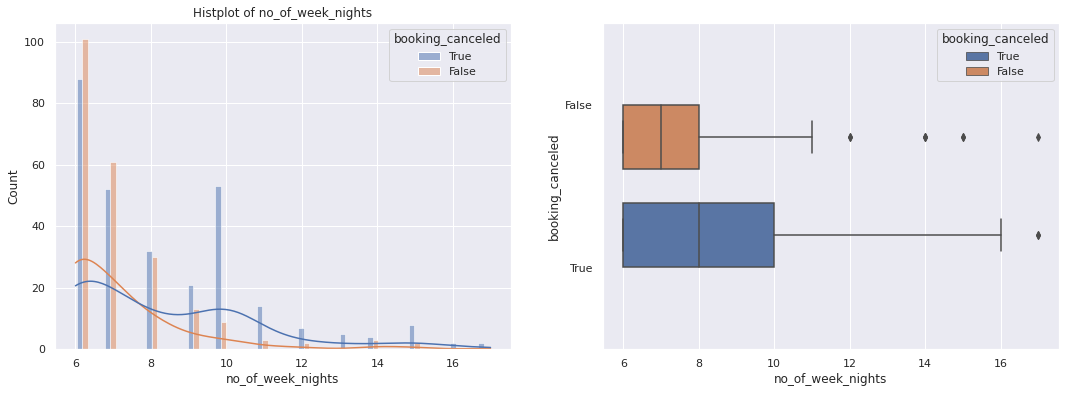

In [ ]:
df1 = df[df['no_of_week_nights']>5][['no_of_week_nights','booking_canceled']]
createNumericGraphForTarget(df1,'booking_canceled')[0]

Neste gráfico podemos ver claramente que a taxa de cancelamentos passa a ser maior que 50% das reservas após 7 noites, deixando claro que existe uma correlação entre as métricas.  

In [ ]:
#  category_variables_tables_per_target['no_of_week_nights'] # Cardinalidade muito alta...

In [ ]:
df1 = df.copy()
df1['no_of_week_nights'] = pd.cut(df['no_of_week_nights'],[0,1,3,5,7,1000], right=True, labels=['0-1','2-3','4-5','6-7','8+'], retbins=True, precision=3, include_lowest=True, duplicates='raise', ordered=True)[0]
df1.groupby(['no_of_week_nights'])['booking_canceled'].value_counts().to_frame()

booking_canceled
no_of_week_nights booking_canceled                  
0-1               False                         8624
                  True                          3251
2-3               False                        12712
                  True                          6571
4-5               False                         2829
                  True                          1775
6-7               False                          162
                  True                           140
8+                True                           148
                  False                           63

In [ ]:
print("Porcentagem de cancelamentos por no_of_week_nights")
print("-----------------------------------------------")
(df1.groupby(['no_of_week_nights'])['booking_canceled'].sum()/df1.groupby(['no_of_week_nights'])['booking_canceled'].count())*100

Porcentagem de cancelamentos por no_of_week_nights
-----------------------------------------------


no_of_week_nights
0-1    27.376842
2-3    34.076648
4-5    38.553432
6-7    46.357616
8+      70.14218
Name: booking_canceled, dtype: Float64

Podemos ver claramente o aumento da taxa conforme o aumento do número de noites.

### lead_time vs booking_canceled

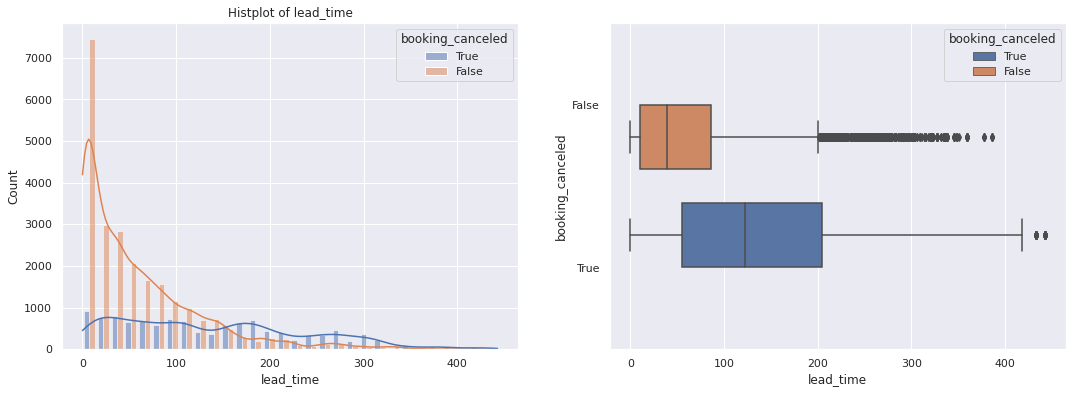

In [ ]:
numeric_variables_graphs_booking_canceled['lead_time']


In [ ]:
category_variables_tables_per_target['lead_time']

booking_canceled
lead_time booking_canceled                  
0         False                    94.757132
          True                      5.242868
1         False                    89.795918
          True                     10.204082
2         False                    94.090202
...                                      ...
386       True                     91.304348
          False                     8.695652
418       True                    100.000000
433       True                    100.000000
443       True                    100.000000

[664 rows x 1 columns]

In [ ]:
df1 = df.copy()
df1['lead_time'] = pd.cut(df['lead_time'],[0,0.9,7,14,30,60,90,120,180,300,390,1000], right=True, labels=['0','1-7','8-14','15-30','31-60','61-90','91-120','121-180','181-300','301-390','391+'], retbins=True, precision=3, include_lowest=True, duplicates='raise', ordered=True)[0]
df1.groupby(['lead_time'])['booking_canceled'].value_counts().to_frame()

booking_canceled
lead_time booking_canceled                  
0         False                         1229
          True                            68
1-7       False                         4058
          True                           446
8-14      False                         2174
          True                           410
15-30     False                         3187
          True                           839
31-60     False                         4827
          True                          1480
61-90     False                         3255
          True                          1253
91-120    False                         2097
          True                          1401
121-180   False                         2185
          True                          2089
181-300   True                          2985
          False                         1168
301-390   True                           812
          False                          210
391+      True                           102

In [ ]:
print("Porcentagem de cancelamentos por lead_time")
print("-----------------------------------------------")
(df1.groupby(['lead_time'])['booking_canceled'].sum()/df1.groupby(['lead_time'])['booking_canceled'].count())*100

Porcentagem de cancelamentos por lead_time
-----------------------------------------------


lead_time
0           5.242868
1-7         9.902309
8-14       15.866873
15-30      20.839543
31-60       23.46599
61-90      27.795031
91-120     40.051458
121-180     48.87693
181-300    71.875752
301-390    79.452055
391+           100.0
Name: booking_canceled, dtype: Float64

Podemos ver claramente que a taxa de cancelamento aumenta conforme o lead_time aumenta, chegando a 100 acima de 390 dias. No modelo final, podemos filtrar os dados que possuem lead_time>390 e adfirmar que eles com certeza serão cancelados. Em uma situação real, essa informação já seria o bastante para tomar ações para previnir esse problema, como por exemplo cobrar uma taxa para agendamentos acima de ~181 dias (em que a taxa de cancelamento passa de 38 para 71%). 

### arrival_year vs booking_canceled

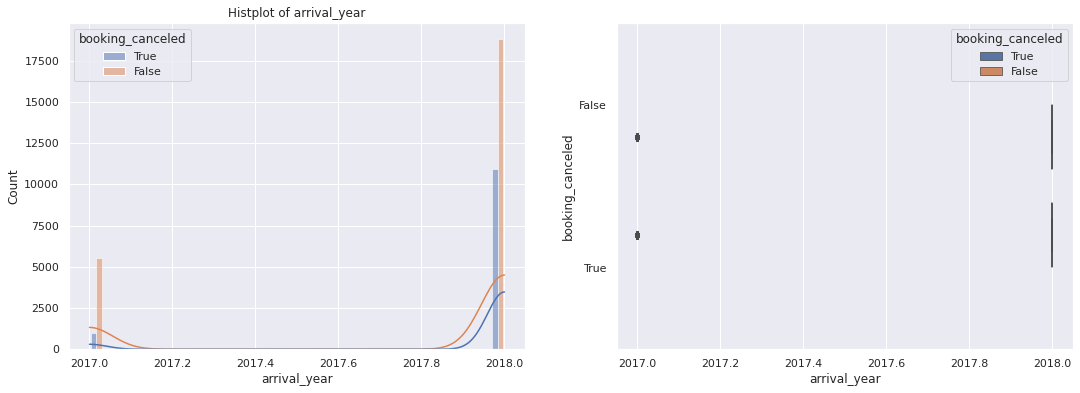

In [ ]:
numeric_variables_graphs_booking_canceled[ 'arrival_year']


In [ ]:
category_variables_tables_per_target['arrival_year']

booking_canceled
arrival_year booking_canceled                  
2017         False                    85.247160
             True                     14.752840
2018         False                    63.294244
             True                     36.705756

Como os dados que desejamos receber em um ambiente de produção devem ser temporais, não faz sentido analisar o ano, já que ele sempre será diferente e não há correlação direta com o target.

### arrival_month vs booking_canceled

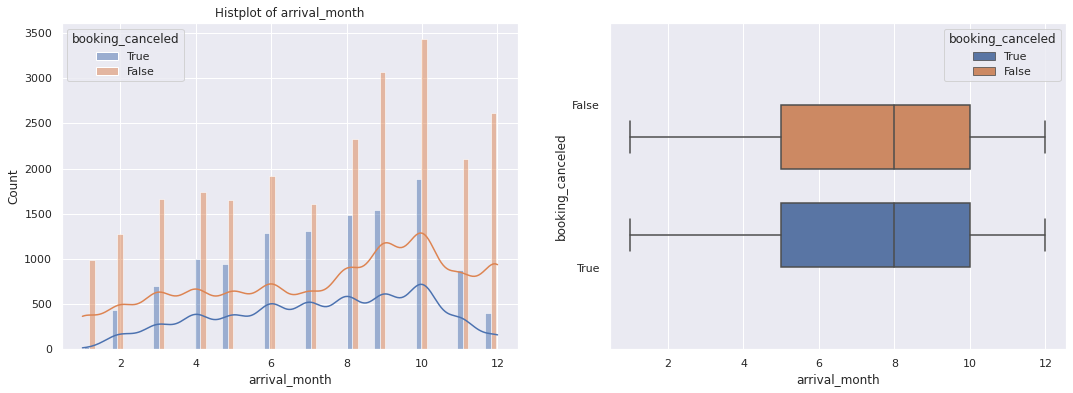

In [ ]:
numeric_variables_graphs_booking_canceled[ 'arrival_month']


In [ ]:
category_variables_tables_per_target['arrival_month']

booking_canceled
arrival_month booking_canceled                  
1             False                    97.633136
              True                      2.366864
2             False                    74.765258
              True                     25.234742
3             False                    70.313825
              True                     29.686175
4             False                    63.633041
              True                     36.366959
5             False                    63.510393
              True                     36.489607
6             False                    59.694037
              True                     40.305963
7             False                    55.000000
              True                     45.000000
8             False                    60.975610
              True                     39.024390
9             False                    66.644979
              True                     33.355021
10            False                    64.641715
              True                     35.358285
11            False                    70.637584
              True                     29.362416
12            False                    86.693148
              True                     13.306852

### arrival_date vs booking_canceled

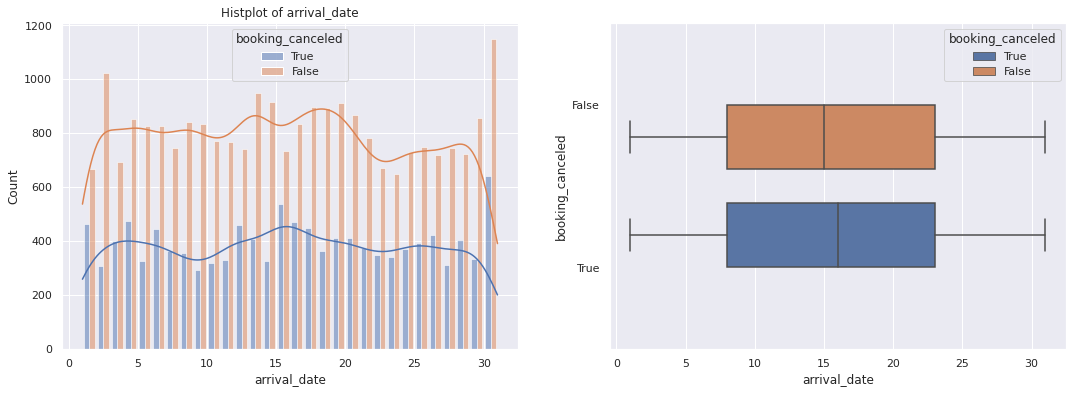

In [ ]:
numeric_variables_graphs_booking_canceled[
       'arrival_date']


In [ ]:
category_variables_tables_per_target['arrival_date']

booking_canceled
arrival_date booking_canceled                  
1            False                    58.958517
             True                     41.041483
2            False                    76.859504
             True                     23.140496
3            False                    63.296903
...                                         ...
29           True                     28.067227
30           False                    61.759868
             True                     38.240132
31           False                    69.204152
             True                     30.795848

[62 rows x 1 columns]

### no_of_previous_cancellations vs booking_canceled

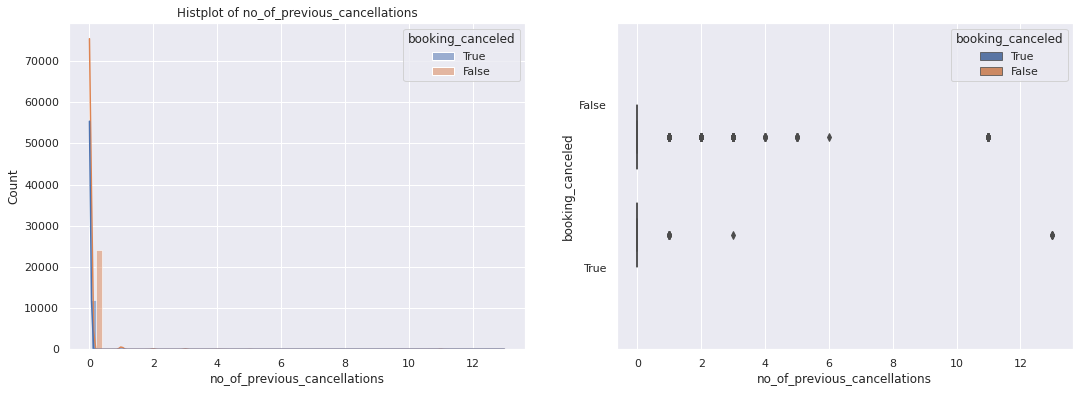

In [ ]:
numeric_variables_graphs_booking_canceled['no_of_previous_cancellations']


In [ ]:
category_variables_tables_per_target['no_of_previous_cancellations']

booking_canceled
no_of_previous_cancellations booking_canceled                  
0                            False                    66.972758
                             True                     33.027242
1                            False                    94.444444
                             True                      5.555556
2                            False                   100.000000
3                            False                    97.674419
                             True                      2.325581
4                            False                   100.000000
5                            False                   100.000000
6                            False                   100.000000
11                           False                   100.000000
13                           True                    100.000000

In [ ]:
df1 = df.copy()
df1['no_of_previous_cancellations'] = pd.cut(df['no_of_previous_cancellations'],[0,0.99,1,1000], right=True, labels=[0,1,'2+'], retbins=True, precision=3, include_lowest=True, duplicates='raise', ordered=True)[0]
df1.groupby(['no_of_previous_cancellations'])['booking_canceled'].value_counts().to_frame()

booking_canceled
no_of_previous_cancellations booking_canceled                  
0                            False                        24068
                             True                         11869
1                            False                          187
                             True                            11
2+                           False                          135
                             True                             5

In [ ]:
print("Porcentagem de cancelamentos por no_of_previous_cancellations")
print("-----------------------------------------------")
(df1.groupby(['no_of_previous_cancellations'])['booking_canceled'].sum()/df1.groupby(['no_of_previous_cancellations'])['booking_canceled'].count())*100

Porcentagem de cancelamentos por no_of_previous_cancellations
-----------------------------------------------


no_of_previous_cancellations
0     33.027242
1      5.555556
2+     3.571429
Name: booking_canceled, dtype: Float64

Podemos afirmar que qualquer pessoa que possua no_of_previous_cancellations > 1 não irá cancelar o agendamento, apesar da quantidade de indivíduos não ser muito relevante. Apesar disso, como no_of_previous_cancellations = 1 possui uma taxa de cancelamento de apenas 5.6% (em comparação com 33% quando no_of_previous_cancellations = 0) e uma quantidade de indivíduos considerável, podemos inferir que a conclusão é confiável. A depender de como o algorítimo utilizado se comporte, podemos até filtrar o dado a ser classificado por no_of_previous_cancellations > 1 como não irá cancelar, sabendo que esperaremos ter ~6% de erro, um erro que pode ser menor do que o algorítimo é capaz de inferir.

Vale a pena reanalisar este gráfico realizando o filtro de apenas pessoas que já tiveram cancelamentos prévios, já que a grande maioria não teve.

{'no_of_previous_cancellations': <Figure size 1296x432 with 2 Axes>}

<Figure size 6400x4800 with 0 Axes>

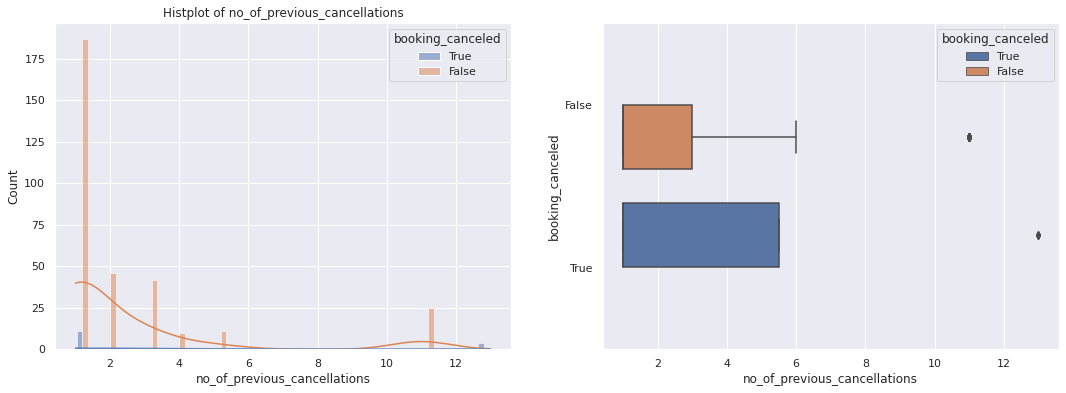

In [ ]:
df1 = df[df['no_of_previous_cancellations']>0][['no_of_previous_cancellations','booking_canceled']]
createNumericGraphForTarget(df1,'booking_canceled')[0]

### no_of_previous_bookings_not_canceled vs booking_canceled

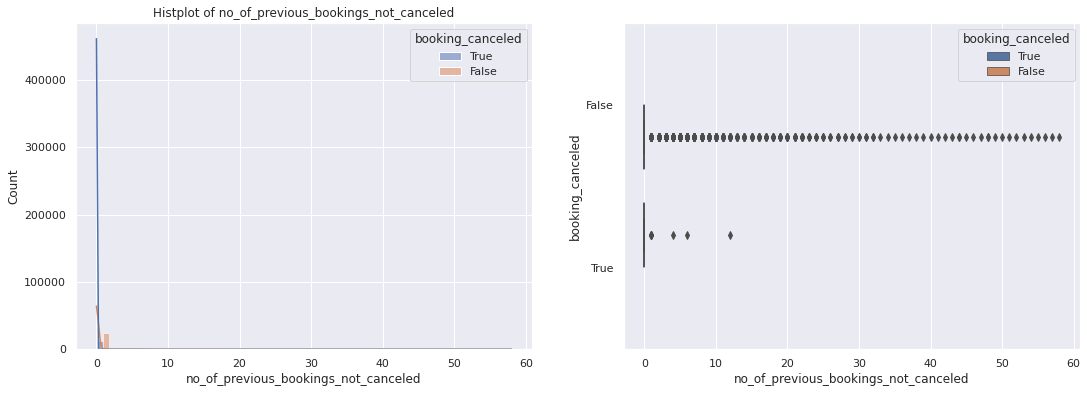

In [ ]:
numeric_variables_graphs_booking_canceled['no_of_previous_bookings_not_canceled']

In [ ]:
# category_variables_tables_per_target['no_of_previous_bookings_not_canceled'] #Alta cardinalidade

In [ ]:
df1 = df.copy()
df1['no_of_previous_bookings_not_canceled'] = pd.cut(df['no_of_previous_bookings_not_canceled'],[0,0.9,12,1000], right=True, labels=[0,'1-12','12+'], retbins=True, precision=3, include_lowest=True, duplicates='raise', ordered=True)[0]
df1.groupby(['no_of_previous_bookings_not_canceled'])['booking_canceled'].value_counts().to_frame()

booking_canceled
no_of_previous_bookings_not_canceled booking_canceled                  
0                                    False                        23585
                                     True                         11878
1-12                                 False                          686
                                     True                             7
12+                                  False                          119

In [ ]:
print("Porcentagem de cancelamentos por no_of_previous_bookings_not_canceled")
print("-----------------------------------------------")
(df1.groupby(['no_of_previous_bookings_not_canceled'])['booking_canceled'].sum()/df1.groupby(['no_of_previous_bookings_not_canceled'])['booking_canceled'].count())*100

Porcentagem de cancelamentos por no_of_previous_bookings_not_canceled
-----------------------------------------------


no_of_previous_bookings_not_canceled
0       33.494064
1-12     1.010101
12+           0.0
Name: booking_canceled, dtype: Float64

Podemos concluir através dessa análise que qualquer cliente que não tenha cancelado os 12 agendamentos anteriores não irá cancelar os futuros. A quantidade de pessoas dentro dessa faixa é relativamente grande, indicando que podemos filtrar esse valor na análise final e considerar que todos que se encaixam nessa situação não irão cancelar o agendamento

Podemos até considerar que qualquer pessoa que possua no_of_previous_bookings_not_canceled maior do que 1 não irá cancelar, já que a taxa de cancelamento é de 1% entre 1 e 12 cancelamentos neste dataset.

{'no_of_previous_bookings_not_canceled': <Figure size 1296x432 with 2 Axes>}

<Figure size 6400x4800 with 0 Axes>

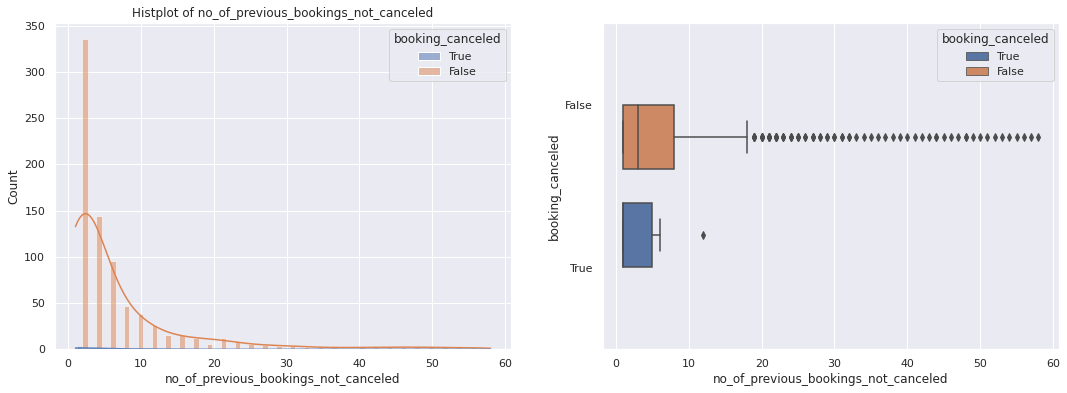

In [ ]:
df1 = df[df['no_of_previous_bookings_not_canceled']>0][['no_of_previous_bookings_not_canceled','booking_canceled']]
createNumericGraphForTarget(df1,'booking_canceled')[0]

### avg_price_per_room vs booking_canceled

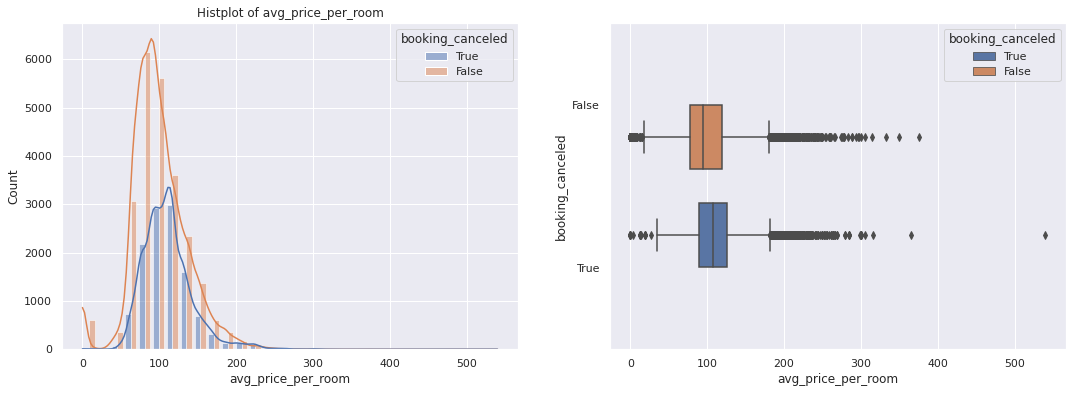

In [ ]:
numeric_variables_graphs_booking_canceled['avg_price_per_room']

In [ ]:
# category_variables_tables_per_target['avg_price_per_room'] 


Como o preço é um valor contínuo, ele não entrega informações relevantes em formato de tabela. Iremos analisar ele em segmentos a fim de conseguirmos analisar melhor o comportamento dessa variável


In [ ]:
df1 = df.copy()
df1['binned_avg_price_per_room'] = pd.cut(df['avg_price_per_room'],[0,75,125,200,10000], right=True, labels=['Muito Baixo','Baixo','Médio','Alto'], retbins=True, precision=3, include_lowest=True, duplicates='raise', ordered=True)[0]
df1.groupby(['binned_avg_price_per_room'])['booking_canceled'].value_counts().to_frame()

booking_canceled
binned_avg_price_per_room booking_canceled                  
Muito Baixo               False                         5471
                          True                          1312
Baixo                     False                        13835
                          True                          7510
Médio                     False                         4831
                          True                          2820
Alto                      False                          253
                          True                           243

In [ ]:
print("Porcentagem de cancelamentos por faixa de preço")
print("-----------------------------------------------")
(df1.groupby(['binned_avg_price_per_room'])['booking_canceled'].sum()/df1.groupby(['binned_avg_price_per_room'])['booking_canceled'].count())*100

Porcentagem de cancelamentos por faixa de preço
-----------------------------------------------


binned_avg_price_per_room
Muito Baixo    19.342474
Baixo          35.183884
Médio          36.857927
Alto           48.991935
Name: booking_canceled, dtype: Float64

Podemos notar que a porcentagem de cancelamentos tende a aumentar com base no aumento da faixa de preço, apesar de não ser uma conclusão muito forte, devido ao baixo número de clientes nas faixas mais altas.

### no_of_special_requests vs booking_canceled

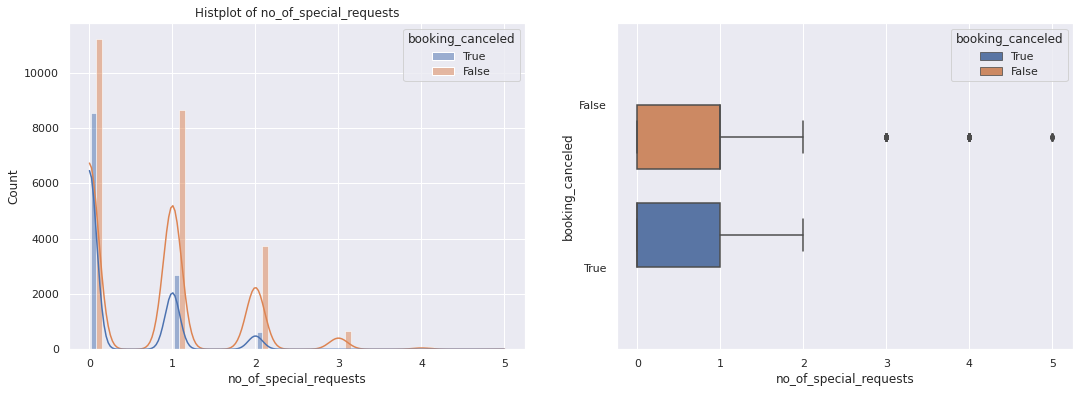

In [ ]:
numeric_variables_graphs_booking_canceled[
       'no_of_special_requests']

In [ ]:
category_variables_tables_per_target['no_of_special_requests']

booking_canceled
no_of_special_requests booking_canceled                  
0                      False                    56.793245
                       True                     43.206755
1                      False                    76.233184
                       True                     23.766816
2                      False                    85.403300
                       True                     14.596700
3                      False                   100.000000
4                      False                   100.000000
5                      False                   100.000000

In [ ]:
df['no_of_special_requests'].value_counts()

0    19777
1    11373
2     4364
3      675
4       78
5        8
Name: no_of_special_requests, dtype: int64

Podemos notar claramente que as pessoas que realizam pedidos especiais tem menos chance de cancelarem e que caso haja mais de 3 pedidos especiais, temos 100% de certeza, com base no dataset, de que o cliente não irá cancelar. A quantidade de clientes nestes 3 segmentos corrobora com essa análise, indicando que podemos realizar um filtro no dataset e considerar que qualquer cluiente que possua mais de 3 pedidos não irá cancelar.


### market_segment_type vs booking_canceled

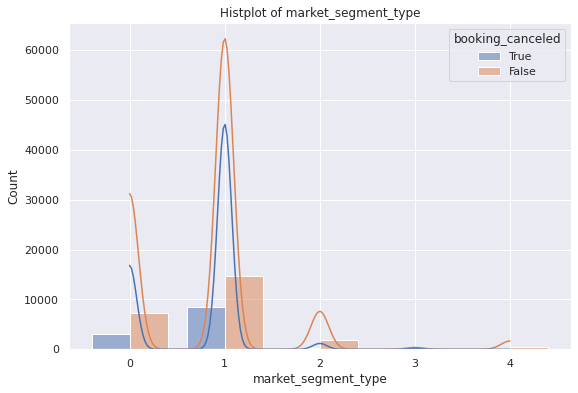

In [ ]:
categorical_variables_graphs_booking_canceled['market_segment_type']

In [ ]:
category_variables_tables_per_target['market_segment_type']

booking_canceled
market_segment_type booking_canceled                  
0                   False                    70.051292
                    True                     29.948708
1                   False                    63.491858
                    True                     36.508142
2                   False                    89.092712
                    True                     10.907288
3                   False                    70.400000
                    True                     29.600000
4                   False                   100.000000

In [ ]:
df['market_segment_type'].value_counts()

1    23214
0    10528
2     2017
4      391
3      125
Name: market_segment_type, dtype: int64

Podemos notar que nenhum cliente do segmento de marketing 4 cancelou, logo podemos realizar um filtro no dataset e considerar que caso o cliente seja do grupo 4, ele não irá cancelar. O fato de haver um número considerável de clientes no segmento 4 reforça essa ideia.

### room_type_reserved vs booking_canceled

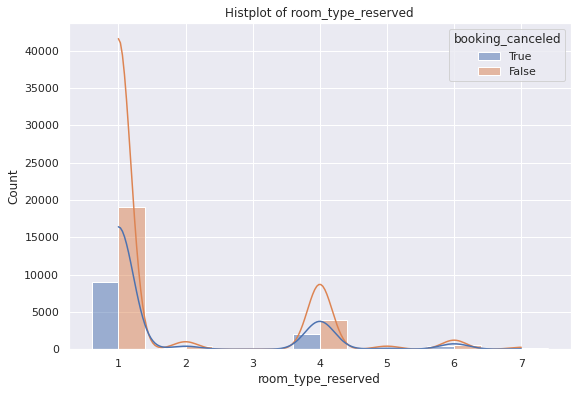

In [ ]:
categorical_variables_graphs_booking_canceled['room_type_reserved']

In [ ]:
category_variables_tables_per_target['room_type_reserved']

booking_canceled
room_type_reserved booking_canceled                  
1                  False                    67.749733
                   True                     32.250267
2                  False                    67.052023
                   True                     32.947977
3                  False                    71.428571
                   True                     28.571429
4                  False                    65.841175
                   True                     34.158825
5                  False                    72.830189
                   True                     27.169811
6                  False                    57.971014
                   True                     42.028986
7                  False                    77.215190
                   True                     22.784810

### type_of_meal_plan vs booking_canceled

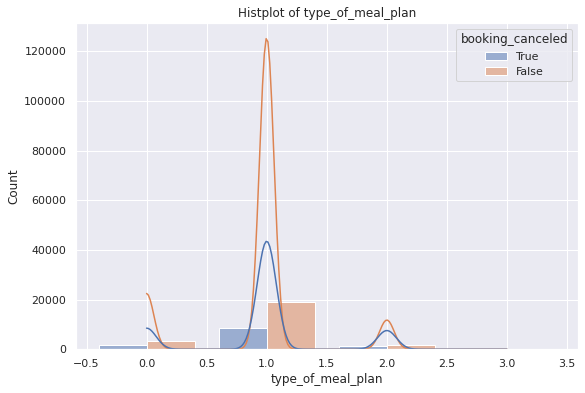

In [ ]:
categorical_variables_graphs_booking_canceled['type_of_meal_plan']

In [ ]:
category_variables_tables_per_target['type_of_meal_plan']

booking_canceled
type_of_meal_plan booking_canceled                  
0                 False                    66.881092
                  True                     33.118908
1                 False                    68.819831
                  True                     31.180169
2                 False                    54.432678
                  True                     45.567322
3                 False                    80.000000
                  True                     20.000000

## Preparação do Dataset de Submissão

In [ ]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_canceled'],
      dtype='object')

In [ ]:

class Preprocessor():

    def applyPreprocessing(self,df_source:pd.DataFrame):
        
        df = df_source.copy()

        df = self.__changeTargetName(df)
        df = self.__groupColumns(df)
        df = self.__conversion(df)

        
        return df[['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
        'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
        'room_type_reserved', 'lead_time','arrival_month',
        'arrival_date', 'market_segment_type', 'repeated_guest',
        'no_of_previous_cancellations', 
        'avg_price_per_room', 'no_of_special_requests', 'booking_canceled']]
     

    def __groupColumns(self,df):	
        df['no_of_weekend_nights'] = pd.cut(df['no_of_weekend_nights'],[0,0.9,1,2,1000], right=True, labels=[0, 1, 2, 3], retbins=True, precision=3, include_lowest=True, duplicates='raise', ordered=True)[0]

        df['no_of_week_nights'] = pd.cut(df['no_of_week_nights'],[0,1,3,5,7,1000], right=True, labels=[0, 1, 2, 3, 4], retbins=True, precision=3, include_lowest=True, duplicates='raise', ordered=True)[0]

        return df

    def __changeTargetName(self,df):
        df['booking_canceled'] = df['booking_status']
        return df

    def __conversion(self,df):

        converter_bool = {'Not_Canceled' : False, 'Canceled' : True, 0 : False, 1 : True}
        converter_int = {'Not Selected' : 0, 'Meal Plan 1' : 1, 'Meal Plan 2' : 2, 'Meal Plan 3': 3, 'Room_Type 1': 1, 'Room_Type 2': 2, 'Room_Type 3': 3, 'Room_Type 4': 4, 'Room_Type 5': 5, 'Room_Type 6': 6, 'Room_Type 7': 7, 'Offline' : 0, 'Online' : 1, 'Corporate' : 2, 'Aviation' : 3, 'Complementary' : 4}
        converter_sub = {False : 0, True : 1}

        #Aplicando converões

        df['required_car_parking_space'] = df['required_car_parking_space'].map(converter_bool)
        df['repeated_guest'] = df['repeated_guest'].map(converter_bool)
        df['booking_canceled'] = df['booking_canceled'].map(converter_bool)
        df['type_of_meal_plan'] = df['type_of_meal_plan'].map(converter_int)
        df['room_type_reserved'] = df['room_type_reserved'].map(converter_int)
        df['market_segment_type'] = df['market_segment_type'].map(converter_int)


        df['required_car_parking_space'] = df['required_car_parking_space'].map(converter_sub)
        df['repeated_guest'] = df['repeated_guest'].map(converter_sub)
        df['booking_canceled'] = df['booking_canceled'].map(converter_sub)


        #definição de dados categoricos e boleanos 
        df['required_car_parking_space'] = df['required_car_parking_space'].astype('int64')
        df['repeated_guest'] = df['repeated_guest'].astype('int64')
        df['booking_canceled'] = df['booking_canceled'].astype('int64')
        df["market_segment_type"] = df["market_segment_type"].astype("int64")
        df["type_of_meal_plan"] = df["type_of_meal_plan"].astype("int64")
        df["room_type_reserved"] = df["room_type_reserved"].astype("int64")
        df["no_of_weekend_nights"] = df["room_type_reserved"].astype("int64")
        df["no_of_week_nights"] = df["room_type_reserved"].astype("int64")
        return df

## Separação entre Treino e Teste

### Divisão do Treino e Teste

## Data Modeling

In [ ]:
class Houdout():
    def __init__(self,df_source:pd.DataFrame,normalize=False,target:str="booking_canceled"):
        self.train_df = []
        self.test_df= []
        self.train_target= []
        self.test_target= []
        df = df_source.copy()
        if(normalize):
            df = self.__normalizeDataframe(df)
            df[target] = df_source[target]
        self.__setHoudout(df,target)

    def __setHoudout(self,df:pd.DataFrame,target:str="booking_canceled"):
        x = df.drop(columns=target)
        y = df[target]
        self.train_df, self.test_df, self.train_target, self.test_target = train_test_split(x,y, test_size=0.2, random_state=42)

        
    def __normalizeDataframe(self,df:pd.DataFrame):
        return (df-df.mean())/df.std()






class ApplyModel():

    def __init__(self,df_source:pd.DataFrame,normalize=False,target:str="booking_canceled"):
        self.houdout = Houdout(df_source,normalize,target)


    def applyModelWithCrossValidation(self,classifier,folds=10):
        result = []
        result2 = []
        self.prediction_list = []
        self.prediction_train_list = []
        self.fittedInstances = []
        kf = KFold(n_splits=folds)
        for train, test in kf.split(self.houdout.train_df):
            
            train_df, test_df = self.houdout.train_df.iloc[train], self.houdout.train_df.iloc[test]

            train_target, test_target = self.houdout.train_target.iloc[train], self.houdout.train_target.iloc[test]
            
            classifier.fit(train_df, train_target)

            self.prediction_list.append(classifier.predict(self.houdout.test_df))

            failed = test_df[test_target!=classifier.predict(test_df)]
            self.fittedInstances.append(classifier)
            self.prediction_train_list.append(failed)

            result.append(self.__calculate_result(test_target, classifier.predict(test_df),classifier.__class__.__name__))

            result2.append(self.__calculate_result(self.houdout.test_target,  classifier.predict(self.houdout.test_df) ,classifier.__class__.__name__))

        return pd.DataFrame(result),pd.DataFrame(result2)
    

    def applyModelWithHoudout(self,classifier):
        classifier.fit(self.houdout.train_df, self.houdout.train_target)
        
        return self.__calculate_result(self.houdout.test_target, classifier.predict(self.houdout.test_df) ,classifier.__class__.__name__)

    def __calculate_result(self,test_y,y_pred,classifier):
        # Definindo os métodos de avaliação
        accuracy = accuracy_score(test_y, y_pred)
        precision = precision_score(test_y, y_pred)
        recall = recall_score(test_y, y_pred)
        f1 = f1_score(test_y, y_pred)
        
        # Adicionando os resultados na lista
        result = {
    
            'Acurácia': accuracy,
            'Precisão': precision,
            'Recall': recall,
            'F1': f1
            
        } 
        return result


###Reanalise

In [ ]:
df_sub = Preprocessor().applyPreprocessing(df_backup)

In [ ]:
modelAppliyer = ApplyModel(df_sub)

In [ ]:
modelAppliyer.applyModelWithHoudout(DecisionTreeClassifier(random_state = 40, criterion='entropy', max_depth=25))

{'Acurácia': 0.8718125430737422,
 'Precisão': 0.803265306122449,
 'Recall': 0.8145695364238411,
 'F1': 0.8088779284833538}

In [ ]:
result1, result2 = modelAppliyer.applyModelWithCrossValidation(DecisionTreeClassifier(random_state = 40, criterion='entropy', max_depth=15))

In [ ]:
result1.describe()

,Acurácia,Precisão,Recall,F1
count,10.000000,10.000000,10.000000,10.000000
mean,0.872398,0.815077,0.787924,0.801137
std,0.004540,0.012622,0.013087,0.006787
min,0.863198,0.794549,0.766990,0.790879
25%,0.870520,0.808599,0.782781,0.796012
50%,0.871985,0.815016,0.786932,0.800429
75%,0.876120,0.824621,0.790127,0.806637
max,0.878704,0.834452,0.808965,0.811549


In [ ]:
result2.describe()

,Acurácia,Precisão,Recall,F1
count,10.000000,10.000000,10.000000,10.000000
mean,0.869331,0.816242,0.784313,0.799895
std,0.003015,0.007872,0.009805,0.004840
min,0.864645,0.802775,0.763659,0.792185
25%,0.867092,0.813356,0.781457,0.796946
50%,0.869538,0.816677,0.786838,0.799916
75%,0.871537,0.822102,0.789321,0.803419
max,0.873329,0.827269,0.799669,0.807861


In [ ]:
normalizeModel=ApplyModel(df_sub,True)

In [ ]:

normalizeModel.applyModelWithHoudout(KNeighborsClassifier(
    
    n_neighbors=25,  weights='distance', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None

))

{'Acurácia': 0.8811853893866299,
 'Precisão': 0.8474955277280859,
 'Recall': 0.7843543046357616,
 'F1': 0.8147033533963888}

In [ ]:
#Melhor modelo de KNN n_eighbor=25 (removido por questão de tempo de processamento e não era o melhor modelo.)
result3, result4 = normalizeModel.applyModelWithCrossValidation(KNeighborsClassifier(
    
    n_neighbors=15,  weights='distance', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None

))

In [ ]:
result3.describe()

,Acurácia,Precisão,Recall,F1
count,10.000000,10.000000,10.000000,10.000000
mean,0.874431,0.828919,0.774880,0.800925
std,0.006790,0.011932,0.017355,0.013108
min,0.865610,0.810465,0.754737,0.785714
25%,0.869831,0.819792,0.764041,0.789715
50%,0.872157,0.829210,0.772011,0.798359
75%,0.880169,0.835185,0.778503,0.811346
max,0.884218,0.848864,0.807531,0.821277


In [ ]:
result4.describe()

,Acurácia,Precisão,Recall,F1
count,10.000000,10.000000,10.000000,10.000000
mean,0.879242,0.845387,0.780050,0.811398
std,0.000925,0.002193,0.003703,0.001741
min,0.878429,0.842806,0.773179,0.809359
25%,0.878567,0.843715,0.778249,0.810162
50%,0.878911,0.845254,0.779180,0.810683
75%,0.879669,0.846302,0.782595,0.812838
max,0.881048,0.849091,0.785596,0.814129


In [ ]:
modelAppliyer.applyModelWithHoudout(RandomForestClassifier(random_state = 40, n_estimators = 5, max_depth=15))

{'Acurácia': 0.875947622329428,
 'Precisão': 0.8592417061611375,
 'Recall': 0.7504139072847682,
 'F1': 0.8011489173663279}

In [ ]:
result5, result6 = 
modelAppliyer.applyModelWithCrossValidation(
RandomForestClassifier(random_state = 40, n_estimators = 15, max_depth=15)
)

In [ ]:
result5.describe()

,Acurácia,Precisão,Recall,F1
count,10.000000,10.000000,10.000000,10.000000
mean,0.883873,0.868537,0.758954,0.809924
std,0.005639,0.013182,0.017309,0.011419
min,0.875258,0.838863,0.740022,0.796400
25%,0.880600,0.865663,0.749536,0.800319
50%,0.882323,0.869810,0.753354,0.808109
75%,0.886630,0.873749,0.757901,0.815888
max,0.892833,0.886061,0.790795,0.829402


In [ ]:
result6.describe()

,Acurácia,Precisão,Recall,F1
count,10.000000,10.000000,10.000000,10.000000
mean,0.880896,0.870566,0.754553,0.808407
std,0.001523,0.004362,0.003758,0.002408
min,0.877188,0.862233,0.748758,0.802920
25%,0.880324,0.869191,0.751242,0.807411
50%,0.881323,0.870552,0.754967,0.809077
75%,0.881943,0.871636,0.757761,0.809953
max,0.882288,0.879009,0.759106,0.810895


In [ ]:
result6

,Acurácia,Precisão,Recall,F1
0,0.881461,0.870829,0.756209,0.809482
1,0.877188,0.862233,0.751242,0.802920
2,0.880083,0.868798,0.753725,0.807181
3,0.882012,0.879009,0.748758,0.808672
4,0.881048,0.867139,0.759106,0.809534
5,0.881185,0.874277,0.751242,0.808103
6,0.882012,0.870370,0.758692,0.810703
7,0.882288,0.871905,0.757864,0.810895
8,0.879945,0.870504,0.751242,0.806487
9,0.881737,0.870599,0.757450,0.810093


O melhor modelo dentre os destados foi o de randon florest com os parâmentros (random_state = 40, n_estimators = 15, max_depth=15), ultilizando cross validation com média 87,06% e desvio padrão de 0.004362, o fold que obteve melhor resultado foi o quarto, obtendo 87,9% de precisão e 88,2% de acurácia. 

###Analise de falha do melhor modelo

In [ ]:
modelAppliyer.prediction_list[3]
modelAppliyer.houdout.test_df[modelAppliyer.houdout.test_target!=modelAppliyer.prediction_list[3]]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests
17656,2,0,4,4,1,0,4,116,4,28,1,0,0,101.58,1
10004,2,0,1,1,0,0,1,181,7,8,1,0,0,85.50,1
20722,2,0,1,1,1,0,1,15,9,12,1,0,0,99.00,0
6187,2,1,1,1,1,0,1,91,10,7,1,0,0,121.50,2
19813,2,0,4,4,1,0,4,41,2,4,1,0,0,82.45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13290,1,0,1,1,1,0,1,3,11,21,2,0,0,65.00,0
24130,2,0,4,4,1,0,4,50,10,8,1,0,0,139.50,1
33990,1,0,1,1,1,0,1,26,11,16,2,0,0,77.00,0
5010,2,0,1,1,0,0,1,12,2,23,1,0,0,79.00,0


In [ ]:
df_fails = modelAppliyer.prediction_train_list[3].append(modelAppliyer.houdout.test_df[modelAppliyer.houdout.test_target!=modelAppliyer.prediction_list[3]], ignore_index=True)

In [ ]:
# Análise das categorias que tiveram mais de 5% de erro.
for column in df_sub.columns:
    if column == 'booking_canceled':
        continue
    else:
        result = (df_fails[column].value_counts()/df_sub[column].value_counts())*100
        if (not result[result>5].empty):
            print(result[result>5])
            print("----------------------------------------------------------------------------------------------------------------------")


3    5.263158
Name: no_of_children, dtype: float64
----------------------------------------------------------------------------------------------------------------------
11       5.390836
17       6.250000
18       5.298013
19       6.645570
31       5.263158
          ...    
294     16.666667
298      5.882353
318    100.000000
332     25.000000
350    100.000000
Name: lead_time, Length: 78, dtype: float64
----------------------------------------------------------------------------------------------------------------------
3    6.149279
Name: arrival_month, dtype: float64
----------------------------------------------------------------------------------------------------------------------
3    5.6
Name: market_segment_type, dtype: float64
----------------------------------------------------------------------------------------------------------------------
12.00       5.882353
38.67       5.882353
44.60     100.000000
51.00      25.000000
52.36      25.000000
             ...    
221.

É possível na análise multivariada concluir as seguintes proposições:

- market_segment_type plan = 4 como "não vai cancelar"

- no_of_special_requests >= 3 como "não vai cancelar"

- no_of_previous_cancellations > 1 como "não vai cancelar"

- lead_time > 390 como "VAI CANCELAR"

- Apenas 19% de cancelamento quando o pre;o do quarto está abaixo de 75 unidades monetárias

Iremos verificar se o modelo foi capaz de indentificá-las:

In [ ]:
df_fails[(df_fails['lead_time']>390) | (df_fails['no_of_previous_cancellations']>1)|(df_fails['no_of_special_requests']>3)|(df_fails['market_segment_type']==4)]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests
184,1,0,1,1,2,0,1,418,9,26,0,0,0,86.0,0


In [ ]:
df_fails[(df_fails['avg_price_per_room']<75)]['avg_price_per_room'].value_counts().sum()/df_sub[df_sub['avg_price_per_room']<75]['avg_price_per_room'].value_counts().sum()

0.021655195568239048

Podemos concluir que o modelo conseguiu generalizar as partes significativas dos dados e apenas não conseguiu compreender os dados mais complexos. Apesar disso, partindo do baseline de 67% (quantidade de dados que não foram cancelados no dataset, que seria o resultado caso estimemos falso para todas as linhas) podemos concluir que o modelo foi bem sucessedido. 

####Testando agrupamento das variaveis

Ao agrupar as variaveis a acuracia e a precisão diminuiram significativamento, levando a descartar essa possibilidade

In [ ]:
# Agrupando variaveis

df1_group = df_backup.copy()

df1_group['no_of_children'] = pd.cut(df1_group['no_of_children'],[0,0.9,1,1000], right=True, labels=[0, 1, 2], retbins=True, precision=3, include_lowest=True, duplicates='raise', ordered=True)[0]

df1_group['no_of_weekend_nights'] = pd.cut(df1_group['no_of_weekend_nights'],[0,0.9,1,2,1000], right=True, labels=[0, 1, 2, 3], retbins=True, precision=3, include_lowest=True, duplicates='raise', ordered=True)[0]

df1_group['no_of_week_nights'] = pd.cut(df1_group['no_of_week_nights'],[0,1,3,5,7,1000], right=True, labels=[0, 1, 2, 3, 4], retbins=True, precision=3, include_lowest=True, duplicates='raise', ordered=True)[0]

df1_group['lead_time'] = pd.cut(df1_group['lead_time'],[0,0.9,7,14,30,60,90,120,180,300,390,1000], right=True, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], retbins=True, precision=3, include_lowest=True, duplicates='raise', ordered=True)[0]

df1_group['no_of_previous_cancellations'] = pd.cut(df1_group['no_of_previous_cancellations'],[0,0.99,1,1000], right=True, labels=[0, 1, 2], retbins=True, precision=3, include_lowest=True, duplicates='raise', ordered=True)[0]

df1_group['no_of_previous_bookings_not_canceled'] = pd.cut(df1_group['no_of_previous_bookings_not_canceled'],[0,0.9,12,1000], right=True, labels=[0, 1, 2], retbins=True, precision=3, include_lowest=True, duplicates='raise', ordered=True)[0]

df1_group['avg_price_per_room'] = pd.cut(df1_group['avg_price_per_room'],[0,75,125,200,10000], right=True, labels=[0, 1, 2, 3], retbins=True, precision=3, include_lowest=True, duplicates='raise', ordered=True)[0]


In [ ]:
df1_group['no_of_children'] = df1_group['no_of_children'].astype(int)
df1_group['no_of_weekend_nights'] = df1_group['no_of_weekend_nights'].astype(int)
df1_group['no_of_week_nights'] = df1_group['no_of_week_nights'].astype(int)
df1_group['lead_time'] = df1_group['lead_time'].astype(int)
df1_group['no_of_previous_cancellations'] = df1_group['no_of_previous_cancellations'].astype(int)
df1_group['no_of_previous_bookings_not_canceled'] = df1_group['no_of_previous_bookings_not_canceled'].astype(int)
df1_group['avg_price_per_room'] = df1_group['avg_price_per_room'].astype(int)


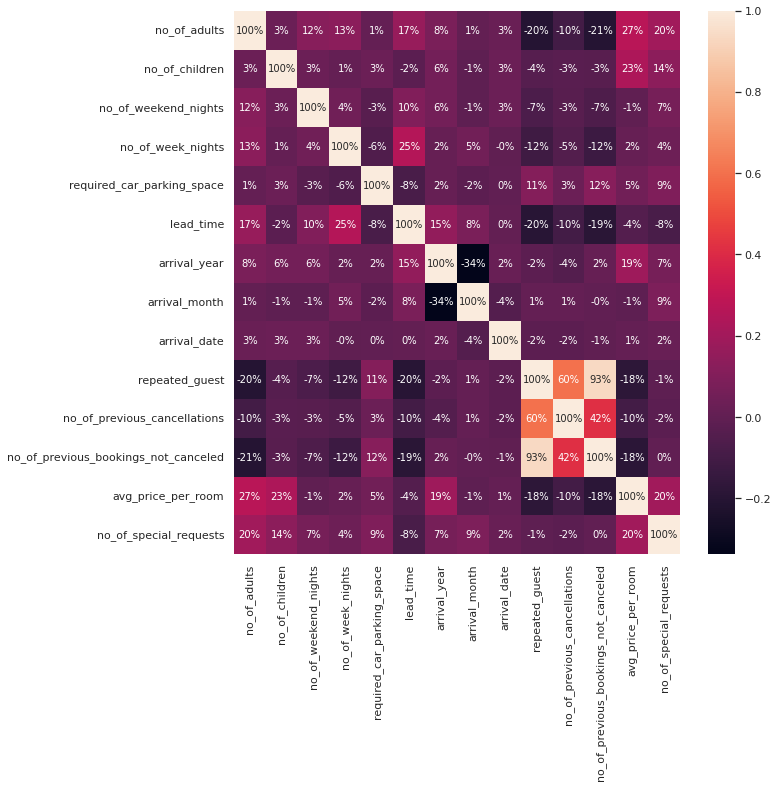

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df1_group.corr(method='spearman'), annot=True, fmt='.0%')
plt.show()

In [ ]:
df2_sub = Preprocessor().applyPreprocessing(df1_group)

In [ ]:
modelAppliyer2 = ApplyModel(df2_sub)

In [ ]:
result7, result8 = modelAppliyer2.applyModelWithCrossValidation(DecisionTreeClassifier(random_state = 40, criterion='entropy', max_depth=25))

In [ ]:
result7.describe()

,Acurácia,Precisão,Recall,F1
count,10.000000,10.000000,10.000000,10.000000
mean,0.843625,0.766980,0.747546,0.757078
std,0.007770,0.014664,0.019043,0.015453
min,0.829083,0.739711,0.717368,0.728368
25%,0.838215,0.756996,0.740480,0.750580
50%,0.845968,0.768066,0.748285,0.761143
75%,0.849586,0.776826,0.754298,0.766668
max,0.853205,0.787419,0.782427,0.778356


In [ ]:
result8.describe()

,Acurácia,Precisão,Recall,F1
count,10.000000,10.000000,10.000000,10.000000
mean,0.850186,0.784282,0.758940,0.771375
std,0.001897,0.005557,0.005561,0.002643
min,0.847829,0.776793,0.747517,0.767857
25%,0.849276,0.782110,0.757968,0.769489
50%,0.849621,0.782757,0.758899,0.770750
75%,0.851482,0.787002,0.761382,0.773280
max,0.853894,0.796070,0.769040,0.775459


In [ ]:
result9, result10 = modelAppliyer2.applyModelWithCrossValidation(RandomForestClassifier(random_state = 40, n_estimators = 5, max_depth=25))

In [ ]:
result9.describe()

,Acurácia,Precisão,Recall,F1
count,10.000000,10.000000,10.000000,10.000000
mean,0.857133,0.795747,0.755956,0.775282
std,0.008234,0.012546,0.019639,0.015122
min,0.844590,0.777907,0.721683,0.748741
25%,0.853119,0.789306,0.741717,0.764770
50%,0.857684,0.792401,0.759886,0.777605
75%,0.861992,0.804640,0.764393,0.784790
max,0.868367,0.818489,0.789749,0.798097


In [ ]:
result10.describe()

,Acurácia,Precisão,Recall,F1
count,10.000000,10.000000,10.000000,10.000000
mean,0.859104,0.803288,0.764031,0.783154
std,0.001620,0.003972,0.004672,0.002556
min,0.855272,0.796699,0.759106,0.777448
25%,0.858649,0.801554,0.760141,0.782822
50%,0.859476,0.802865,0.762210,0.783377
75%,0.860165,0.806516,0.768729,0.784590
max,0.860648,0.808811,0.770695,0.786484


In [ ]:
normalizeModel_group = ApplyModel(df2_sub,True)

In [ ]:
result11, result12 = normalizeModel_group.applyModelWithCrossValidation(KNeighborsClassifier(
    
    n_neighbors=15,  weights='distance', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None

))

In [ ]:
result11.describe()

,Acurácia,Precisão,Recall,F1
count,10.000000,10.000000,10.000000,10.000000
mean,0.859511,0.806810,0.748787,0.776593
std,0.008027,0.017004,0.017569,0.013827
min,0.844590,0.786134,0.729101,0.758503
25%,0.853980,0.792795,0.735870,0.764436
50%,0.860441,0.801984,0.743117,0.777138
75%,0.865265,0.822169,0.760754,0.788256
max,0.870090,0.831828,0.784519,0.796326


In [ ]:
result12.describe()

,Acurácia,Precisão,Recall,F1
count,10.000000,10.000000,10.000000,10.000000
mean,0.863005,0.818537,0.756291,0.786180
std,0.001337,0.002902,0.002730,0.002054
min,0.861061,0.814222,0.752483,0.783133
25%,0.861682,0.816319,0.754243,0.784182
50%,0.863611,0.818182,0.756209,0.786892
75%,0.864025,0.820628,0.758175,0.787869
max,0.864645,0.822973,0.761175,0.788593
